In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

results_file = './results/results.csv'
df = pd.read_csv(results_file)

df['throughput'] = df['query_size'] / df['latency_(s)']

df.head()

cpu_architecture  cpu_core_count                             cpu_model_name  \
0           x86_64              12  Intel(R) Core(TM) i7-10750H CPU @ 2.60GHz   
1           x86_64              12  Intel(R) Core(TM) i7-10750H CPU @ 2.60GHz   
2           x86_64              12  Intel(R) Core(TM) i7-10750H CPU @ 2.60GHz   
3           x86_64              12  Intel(R) Core(TM) i7-10750H CPU @ 2.60GHz   
4           x86_64              12  Intel(R) Core(TM) i7-10750H CPU @ 2.60GHz   

   cpu_clock_speed_(MHz)  total_DRAM_(GB)  storage_read_count  \
0                2592.01        13.653496               55944   
1                2592.01        13.653496               55947   
2                2592.01        13.653496               55947   
3                2592.01        13.653496               55947   
4                2592.01        13.653496               55947   

   storage_write_count  storage_read_bytes  storage_write_bytes  \
0                11623          3015792640           9684422656   
1                11623          3016181760           9684422656   
2                11623          3016181760           9684422656   
3                11623          3016181760           9684422656   
4                11623          3016181760           9684422656   

                                     storage_devices  ... query_size  \
0  [{'Name': 'sda', 'Type': 'disk', 'Size': '388....  ...         10   
1  [{'Name': 'sda', 'Type': 'disk', 'Size': '388....  ...         10   
2  [{'Name': 'sda', 'Type': 'disk', 'Size': '388....  ...         10   
3  [{'Name': 'sda', 'Type': 'disk', 'Size': '388....  ...         10   
4  [{'Name': 'sda', 'Type': 'disk', 'Size': '388....  ...         20   

  peak_dram_(MB) peak_WSS_(MB)                      index index_type    dtype  \
0     140.863281    140.863281  gist10K_64D_float32.annoy      annoy  float32   
1     141.355469    141.355469  gist10K_64D_float32.annoy      annoy  float32   
2     141.367188    141.367188  gist10K_64D_float32.annoy      annoy  float32   
3     141.382812    141.382812  gist10K_64D_float32.annoy      annoy  float32   
4     141.601562    141.601562  gist10K_64D_float32.annoy      annoy  float32   

   latency_(s)  recall1 recall2  throughput  
0     0.054789    1.000     1.0  182.517374  
1     0.036307    1.000     1.0  275.428249  
2     0.033980    0.990     1.0  294.289623  
3     0.034698    0.977     1.0  288.204931  
4     0.048295    1.000     1.0  414.125453  

[5 rows x 29 columns]

In [100]:
Q1 = df['latency_(s)'].quantile(0.25)
Q3 = df['latency_(s)'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['latency_(s)'] >= lower_bound) & (df['latency_(s)'] <= upper_bound)]

In [101]:
df.describe()

cpu_core_count  cpu_clock_speed_(MHz)  total_DRAM_(GB)  \
count          9991.0            9991.000000      9991.000000   
mean             12.0            2592.008151        13.653497   
std               0.0               0.003846         0.000002   
min              12.0            2591.997000        13.653496   
25%              12.0            2592.007000        13.653496   
50%              12.0            2592.010000        13.653496   
75%              12.0            2592.010000        13.653500   
max              12.0            2592.010000        13.653500   

       storage_read_count  storage_write_count  storage_read_bytes  \
count        9.991000e+03          9991.000000        9.991000e+03   
mean         5.718740e+07         49893.005105        2.154122e+12   
std          4.549767e+07         27009.725527        1.861592e+12   
min          2.571200e+04           587.000000        7.647375e+08   
25%          1.691290e+07         24868.000000        4.486269e+11   
50%          4.361899e+07         55635.000000        1.640519e+12   
75%          9.676164e+07         72157.000000        3.561830e+12   
max          1.499272e+08         99258.000000        6.328841e+12   

       storage_write_bytes         dims     index_size            k  \
count         9.991000e+03  9991.000000    9991.000000  9991.000000   
mean          1.907109e+10   337.955360  221427.284556    40.232709   
std           2.127857e+10   277.608631  201256.226639    39.106710   
min           1.760051e+07    64.000000   10000.000000     1.000000   
25%           9.761161e+09   128.000000   50000.000000    10.000000   
50%           9.932722e+09   256.000000  100000.000000    10.000000   
75%           1.011917e+10   512.000000  400000.000000    50.000000   
max           6.234912e+10   960.000000  600000.000000   100.000000   

         query_size  peak_dram_(MB)  peak_WSS_(MB)  latency_(s)      recall1  \
count   9991.000000     9991.000000    9991.000000  9991.000000  9991.000000   
mean    2948.468622      680.031305     937.729216     1.049278     0.864811   
std     3446.140087      379.851838     534.599600     0.949610     0.119085   
min       10.000000      140.863281     140.863281     0.033980     0.453703   
25%       80.000000      531.792969     592.222656     0.268544     0.801840   
50%      640.000000      584.410156     780.773438     0.803652     0.901500   
75%     5120.000000      722.980469    1281.035156     1.511308     0.956250   
max    10000.000000     2760.238281    2760.238281     4.165153     1.000000   

           recall2    throughput  
count  9991.000000   9991.000000  
mean      0.921988   2467.904208  
std       0.084680   3185.909152  
min       0.400000      2.550191  
25%       0.892000    289.460307  
50%       0.950000    940.960943  
75%       0.983000   3622.116009  
max       1.000000  18309.677408

# Latency

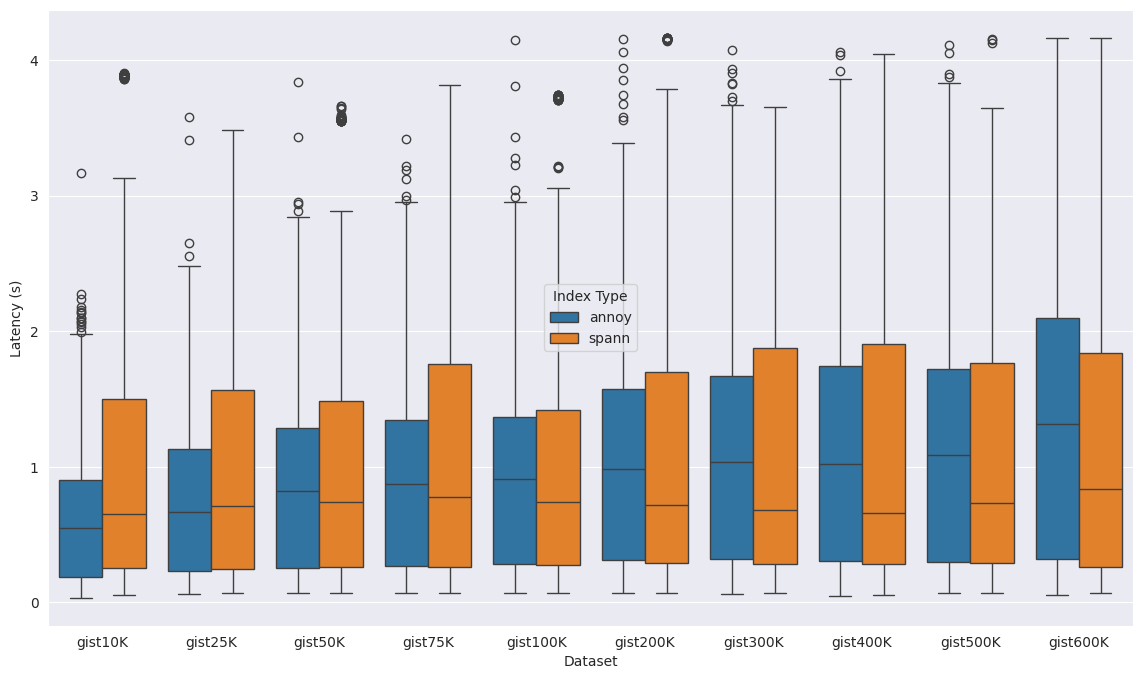

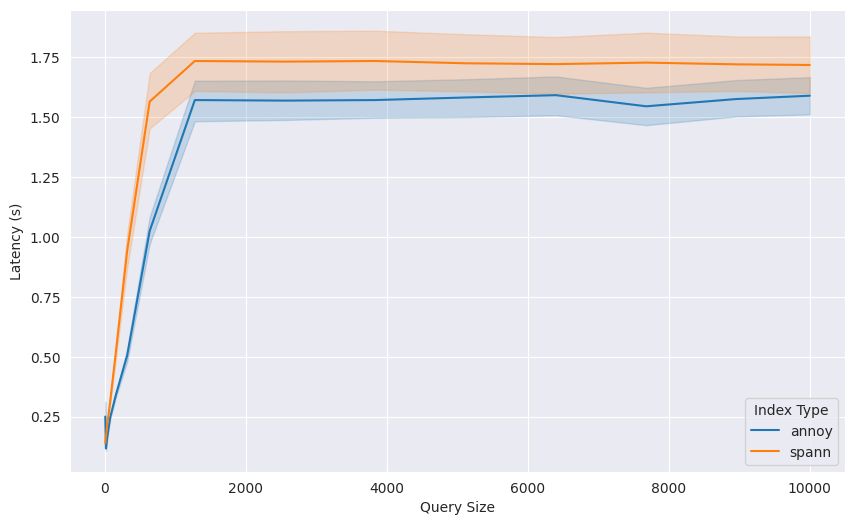

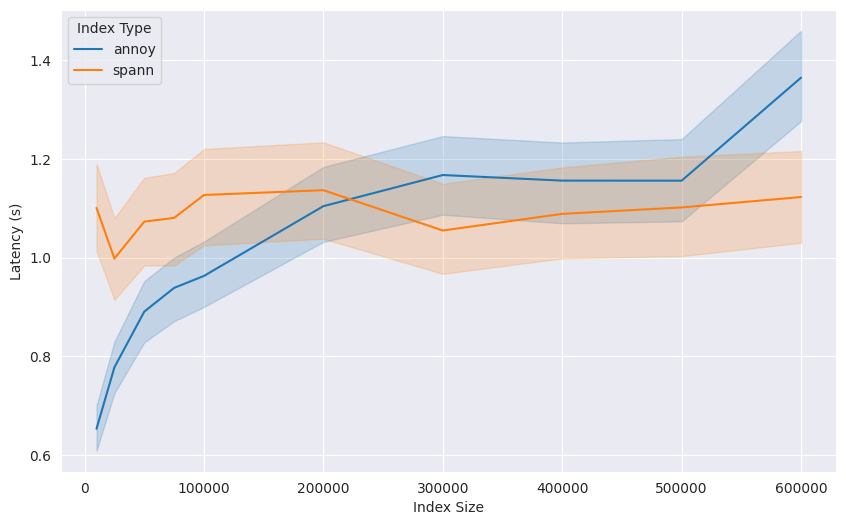

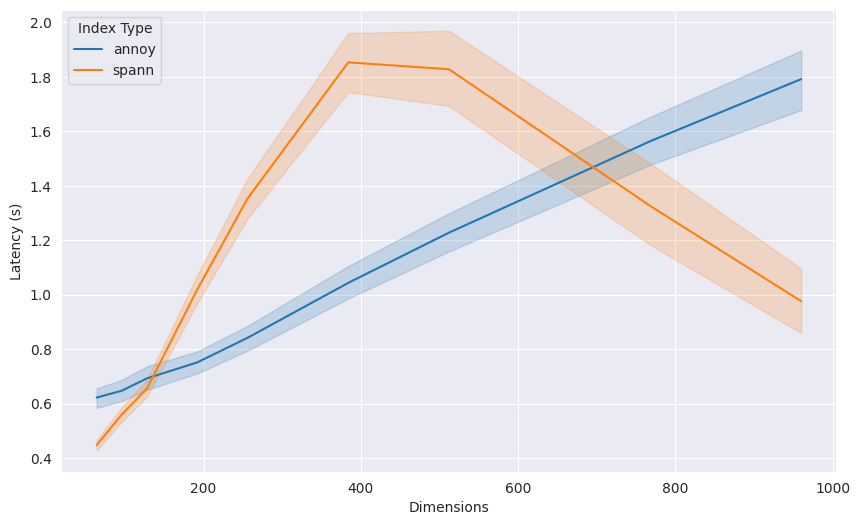

In [102]:
# Latency Distribution
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='dataset', y='latency_(s)', hue='index_type')
plt.xlabel('Dataset')
plt.ylabel('Latency (s)')
plt.legend(title='Index Type')
plt.savefig('./figures/latency_distribution.png')
plt.show()

# Latency vs Query Size
plt.figure(figsize=(10, 6))
sns.lineplot(x='query_size', y='latency_(s)', hue='index_type', data=df)
plt.xlabel('Query Size')
plt.ylabel('Latency (s)')
plt.legend(title='Index Type')
plt.savefig('./figures/latency_vs_query_size.png')
plt.show()

# Latency vs Index Size
plt.figure(figsize=(10, 6))
sns.lineplot(x='index_size', y='latency_(s)', hue='index_type', data=df)
plt.xlabel('Index Size')
plt.ylabel('Latency (s)')
plt.legend(title='Index Type')
plt.savefig('./figures/latency_vs_index_size.png')
plt.show()

# Latency vs Dimensions
plt.figure(figsize=(10, 6))
sns.lineplot(x='dims', y='latency_(s)', hue='index_type', data=df)
plt.xlabel('Dimensions')
plt.ylabel('Latency (s)')
plt.legend(title='Index Type')
plt.savefig('./figures/latency_vs_dims.png')
plt.show()

# Throughput

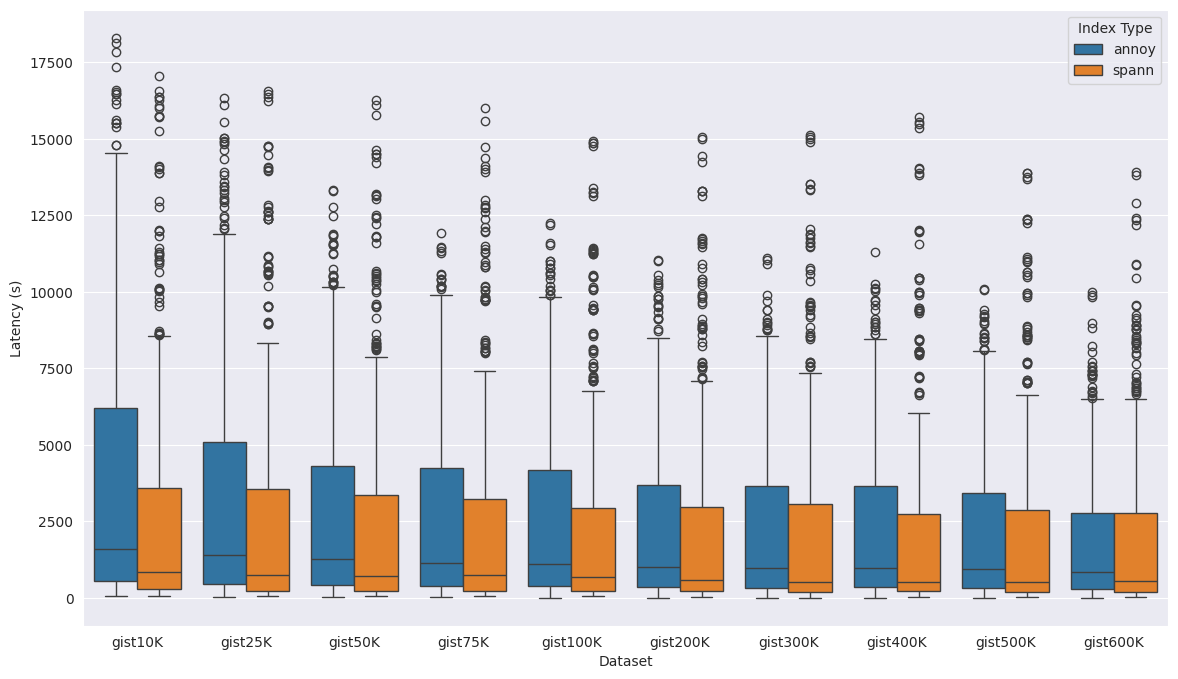

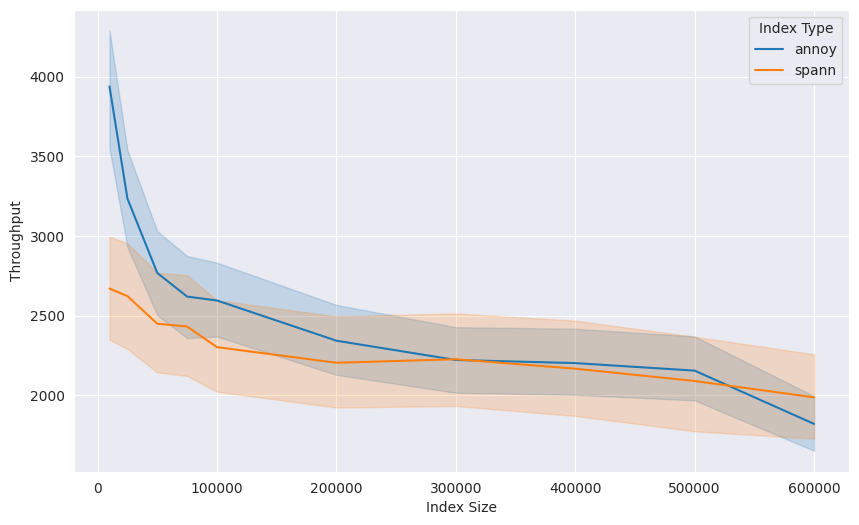

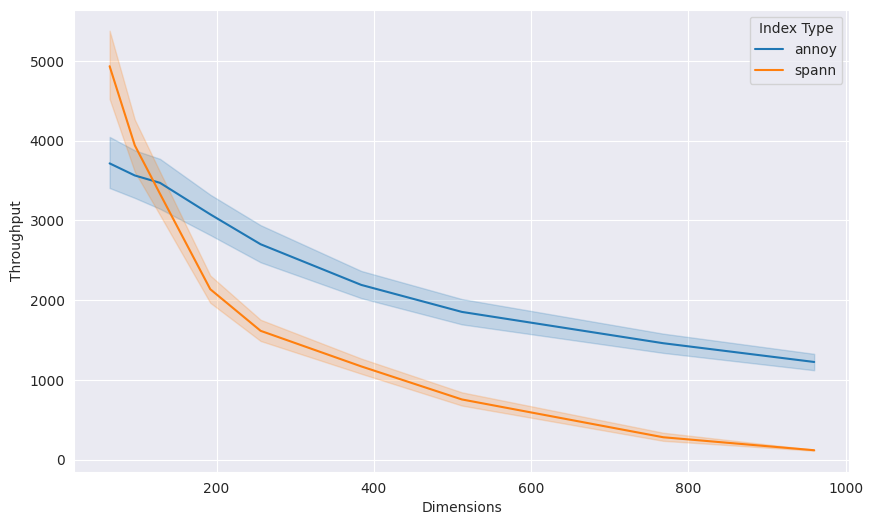

In [103]:
# Latency Distribution
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='dataset', y='throughput', hue='index_type')
plt.xlabel('Dataset')
plt.ylabel('Latency (s)')
plt.legend(title='Index Type')
plt.savefig('./figures/throughput_distribution.png')
plt.show()

# # Throughout vs Query Size
# plt.figure(figsize=(10, 6))
# sns.lineplot(x='query_size', y='throughput', hue='index_type', data=df)
# plt.xlabel('Query Size')
# plt.ylabel('Throughput')
# plt.legend(title='Index Type')
# plt.savefig('./figures/throughput_vs_query_size.png')
# plt.show()

# Throughout vs Index Size
plt.figure(figsize=(10, 6))
sns.lineplot(x='index_size', y='throughput', hue='index_type', data=df)
plt.xlabel('Index Size')
plt.ylabel('Throughput')
plt.legend(title='Index Type')
plt.savefig('./figures/throughput_vs_index_size.png')
plt.show()

# Throughout vs Dimensions
plt.figure(figsize=(10, 6))
sns.lineplot(x='dims', y='throughput', hue='index_type', data=df)
plt.xlabel('Dimensions')
plt.ylabel('Throughput')
plt.legend(title='Index Type')
plt.savefig('./figures/throughput_vs_dims.png')
plt.show()

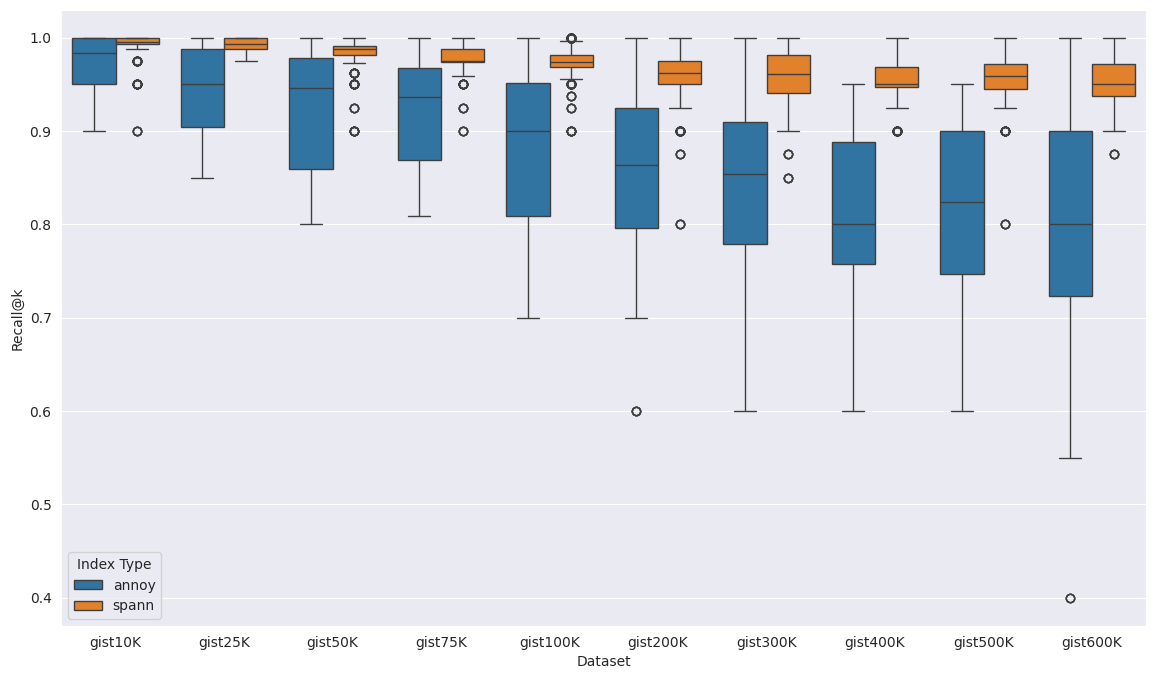

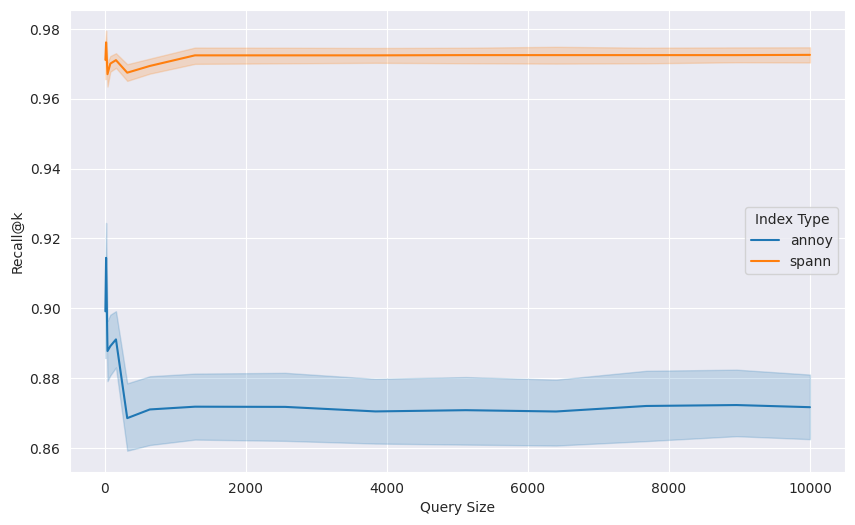

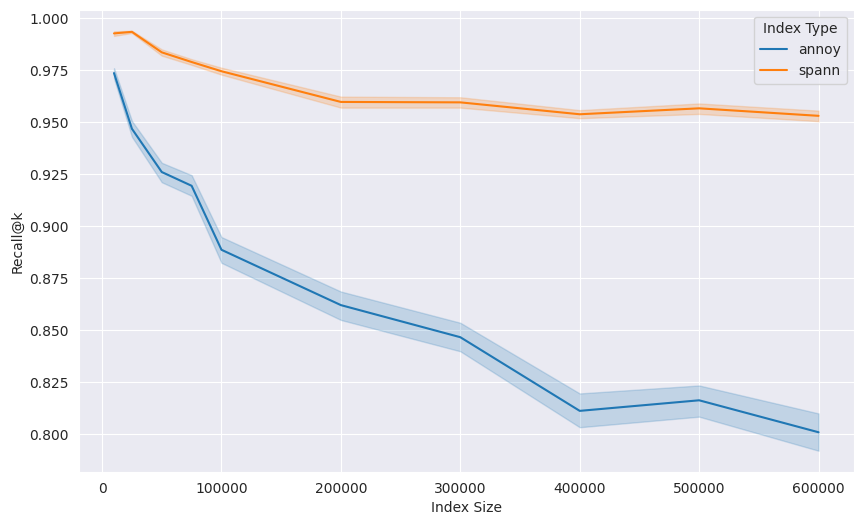

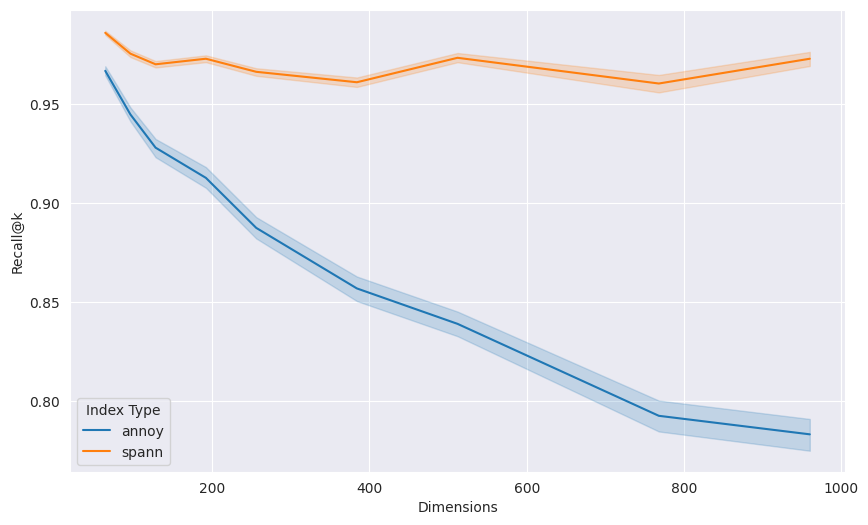

In [104]:
# Recall Distribution
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='dataset', y='recall2', hue='index_type')
plt.xlabel('Dataset')
plt.ylabel('Recall@k')
plt.legend(title='Index Type')
plt.savefig('./figures/recall_distribution.png')
plt.show()

# Recall vs Query Size
plt.figure(figsize=(10, 6))
sns.lineplot(x='query_size', y='recall2', hue='index_type', data=df)
plt.xlabel('Query Size')
plt.ylabel('Recall@k')
plt.legend(title='Index Type')
plt.savefig('./figures/recall_vs_query_size.png')
plt.show()

# Recall vs Index Size
plt.figure(figsize=(10, 6))
sns.lineplot(x='index_size', y='recall2', hue='index_type', data=df)
plt.xlabel('Index Size')
plt.ylabel('Recall@k')
plt.legend(title='Index Type')
plt.savefig('./figures/recall_vs_index_size.png')
plt.show()

# Recall vs Dimensions
plt.figure(figsize=(10, 6))
sns.lineplot(x='dims', y='recall2', hue='index_type', data=df)
plt.xlabel('Dimensions')
plt.ylabel('Recall@k')
plt.legend(title='Index Type')
plt.savefig('./figures/recall_vs_dims.png')
plt.show()

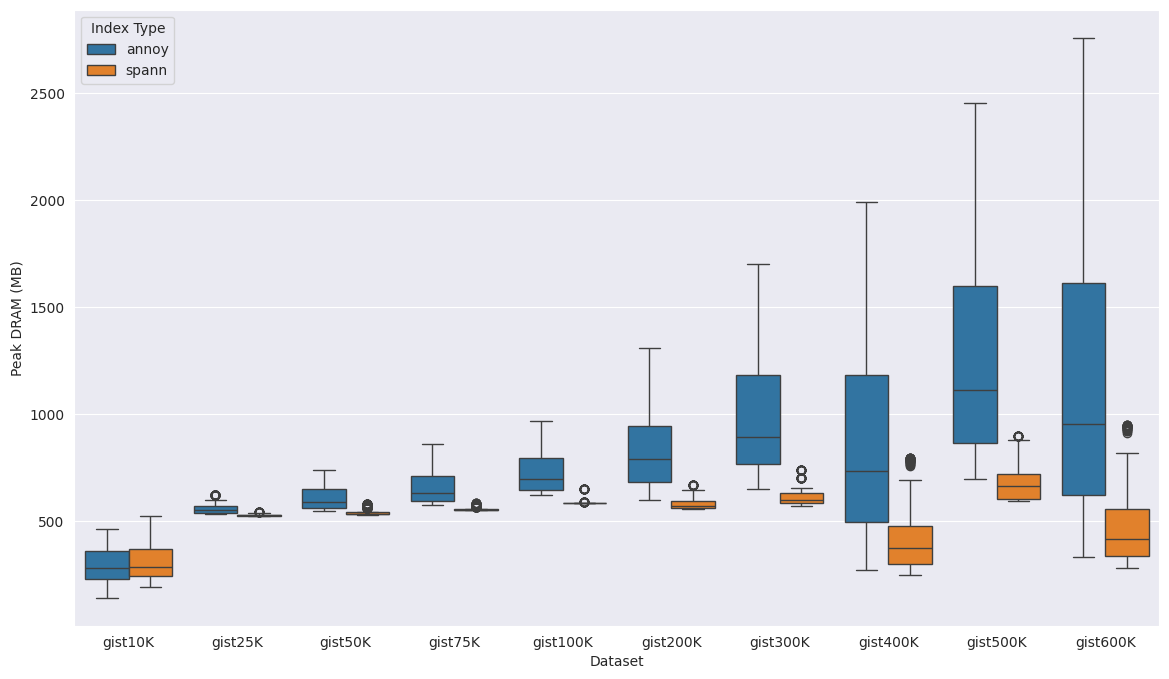

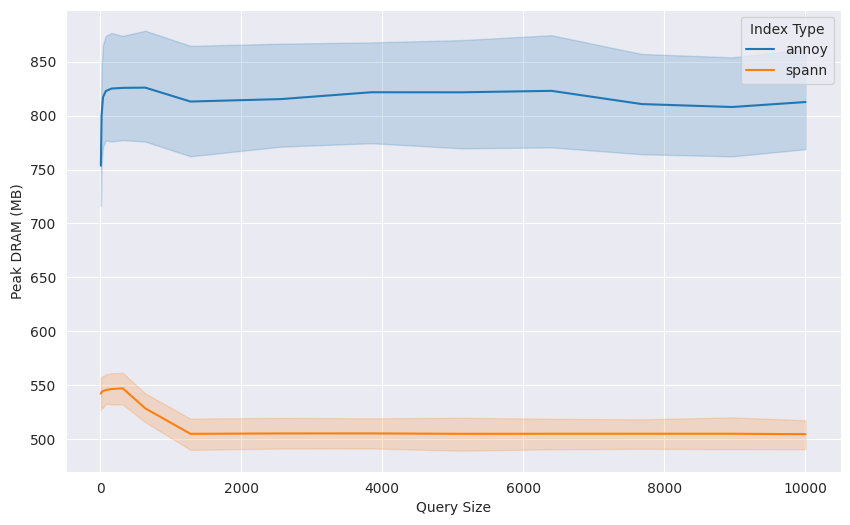

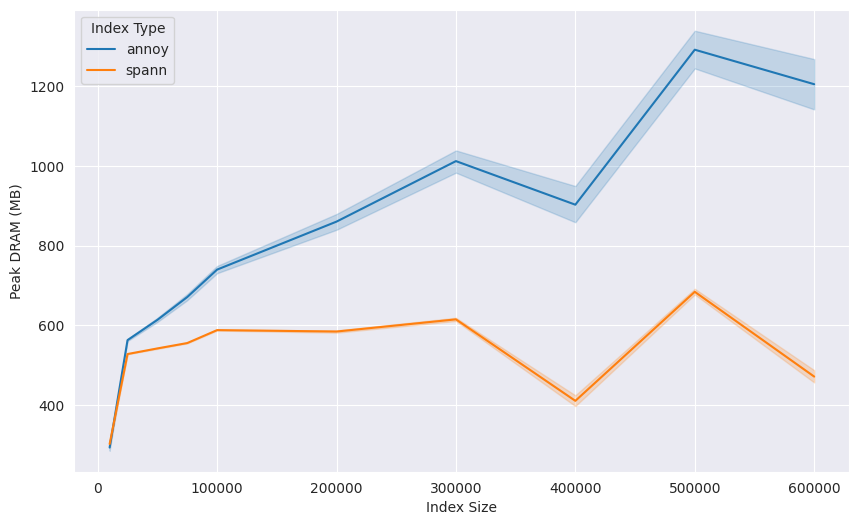

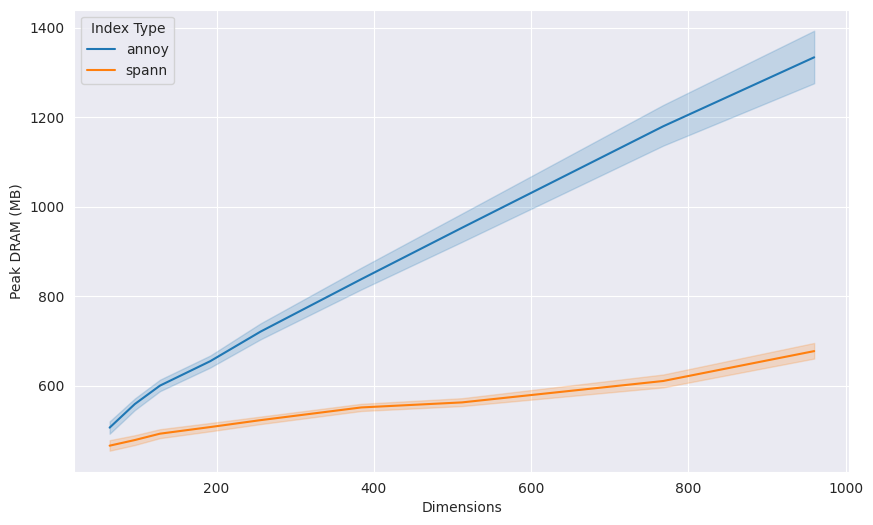

In [105]:
# DRAM Distribution
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='dataset', y='peak_dram_(MB)', hue='index_type')
plt.xlabel('Dataset')
plt.ylabel('Peak DRAM (MB)')
plt.legend(title='Index Type')
plt.savefig('./figures/dram_distribution.png')
plt.show()

# DRAM vs Query Size
plt.figure(figsize=(10, 6))
sns.lineplot(x='query_size', y='peak_dram_(MB)', hue='index_type', data=df)
plt.xlabel('Query Size')
plt.ylabel('Peak DRAM (MB)')
plt.legend(title='Index Type')
plt.savefig('./figures/dram_vs_query_size.png')
plt.show()

# DRAM vs Index Size
plt.figure(figsize=(10, 6))
sns.lineplot(x='index_size', y='peak_dram_(MB)', hue='index_type', data=df)
plt.xlabel('Index Size')
plt.ylabel('Peak DRAM (MB)')
plt.legend(title='Index Type')
plt.savefig('./figures/dram_vs_index_size.png')
plt.show()

# DRAM vs Dimensions
plt.figure(figsize=(10, 6))
sns.lineplot(x='dims', y='peak_dram_(MB)', hue='index_type', data=df)
plt.xlabel('Dimensions')
plt.ylabel('Peak DRAM (MB)')
plt.legend(title='Index Type')
plt.savefig('./figures/dram_vs_dims.png')
plt.show()

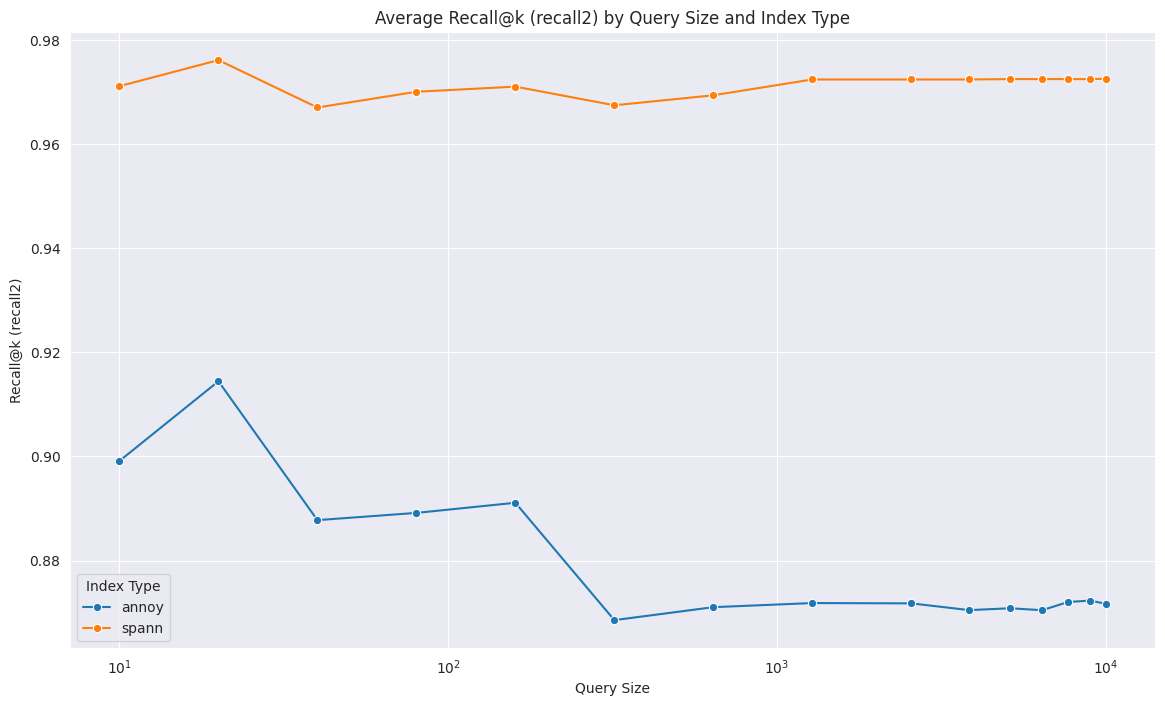

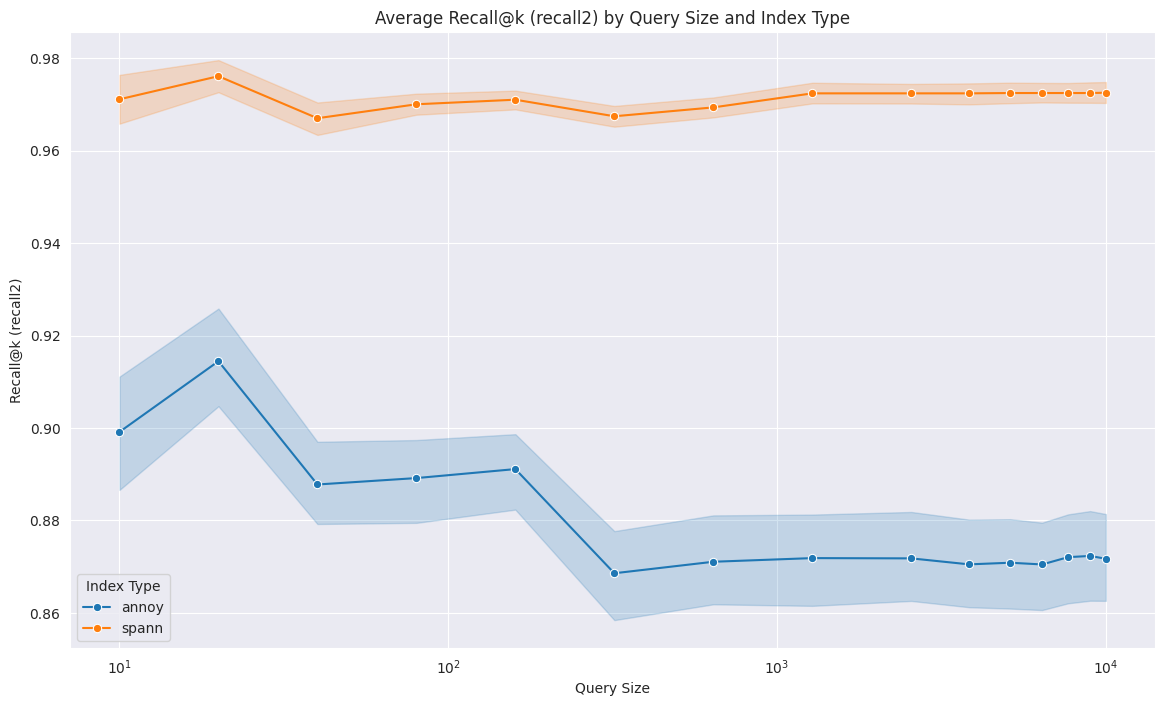

In [106]:
# Average recall by query size and index type
recall_avg = df.groupby(['query_size', 'index_type'])['recall2'].mean().reset_index()

plt.figure(figsize=(14, 8))
sns.lineplot(data=recall_avg, x='query_size', y='recall2', hue='index_type', marker='o')
plt.title('Average Recall@k (recall2) by Query Size and Index Type')
plt.xlabel('Query Size')
plt.ylabel('Recall@k (recall2)')
plt.legend(title='Index Type')
plt.xscale('log')
plt.show()

plt.figure(figsize=(14, 8))
sns.lineplot(data=df, x='query_size', y='recall2', hue='index_type', marker='o')
plt.title('Average Recall@k (recall2) by Query Size and Index Type')
plt.xlabel('Query Size')
plt.ylabel('Recall@k (recall2)')
plt.legend(title='Index Type')
plt.xscale('log')
plt.show()

Training RMSE: 1.0799387537627803
Test RMSE: 1.122235313749081
R^2 Score: 0.5381814933549249


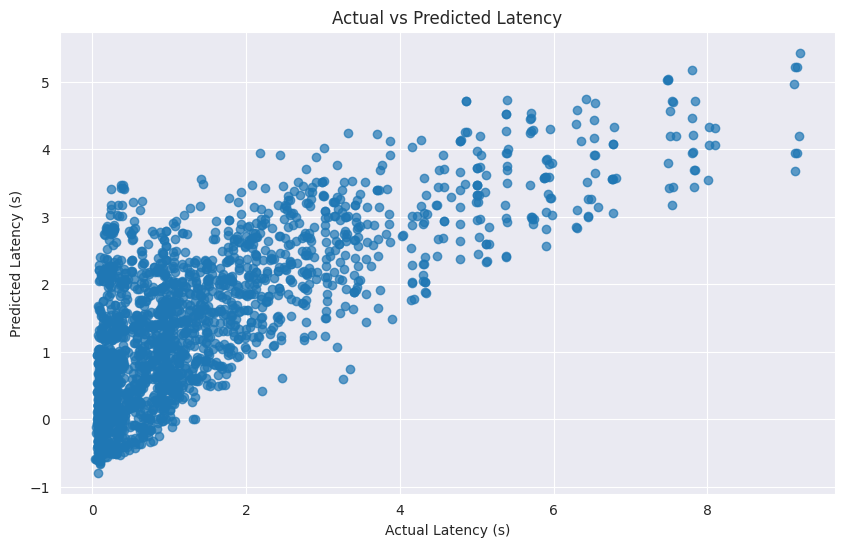

In [123]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error, r2_score
# import matplotlib.pyplot as plt
# 
# # Load the data
# csv_file_path = './results/results.csv'  # Adjust this path to where your CSV file is located
# df = pd.read_csv(csv_file_path)
# 
# # Select only the relevant columns
# df = df[['latency_(s)', 'recall2', 'peak_dram_(MB)', 'index_type', 'query_size', 'k', 'dims', 'index_size']]
# 
# # Convert categorical variables to dummy variables
# df = pd.get_dummies(df, columns=['index_type'], drop_first=True)
# 
# # Define the target variable (performance metric to predict, e.g., 'latency_(s)')
# target_variable = 'latency_(s)'
# 
# # Define the features (all other columns except the target)
# features = df.drop(columns=[target_variable])
# 
# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(features, df[target_variable], test_size=0.2, random_state=42)
# 
# # Standardize the features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)
# 
# # Train a regression model
# regressor = LinearRegression()
# regressor.fit(X_train_scaled, y_train)
# 
# # Make predictions
# y_train_pred = regressor.predict(X_train_scaled)
# y_test_pred = regressor.predict(X_test_scaled)
# 
# # Evaluate the model
# train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
# test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
# r2 = r2_score(y_test, y_test_pred)
# 
# print(f'Training RMSE: {train_rmse}')
# print(f'Test RMSE: {test_rmse}')
# print(f'R^2 Score: {r2}')
# 
# # Plot predictions vs actual values
# plt.figure(figsize=(10, 6))
# plt.scatter(y_test, y_test_pred, alpha=0.7)
# plt.xlabel('Actual Latency (s)')
# plt.ylabel('Predicted Latency (s)')
# plt.title('Actual vs Predicted Latency')
# plt.show()

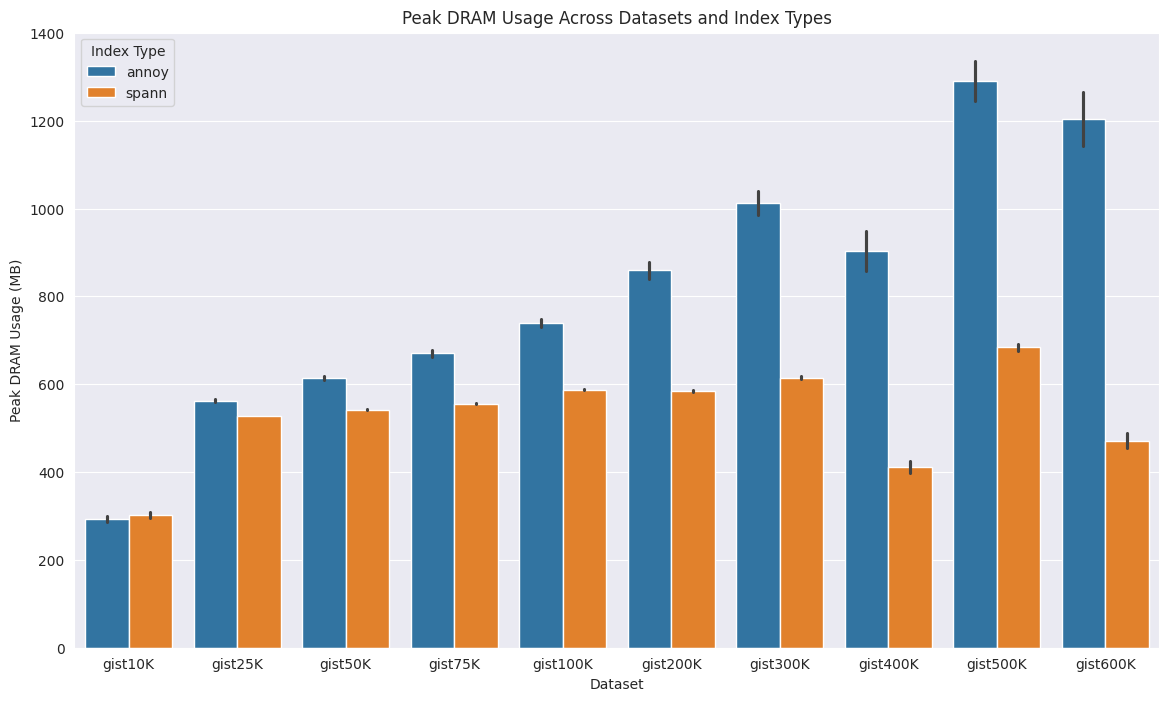

In [107]:
# Memory usage by index type and dataset
plt.figure(figsize=(14, 8))
sns.barplot(data=df, x='dataset', y='peak_dram_(MB)', hue='index_type')
plt.title('Peak DRAM Usage Across Datasets and Index Types')
plt.xlabel('Dataset')
plt.ylabel('Peak DRAM Usage (MB)')
plt.legend(title='Index Type')
plt.show()

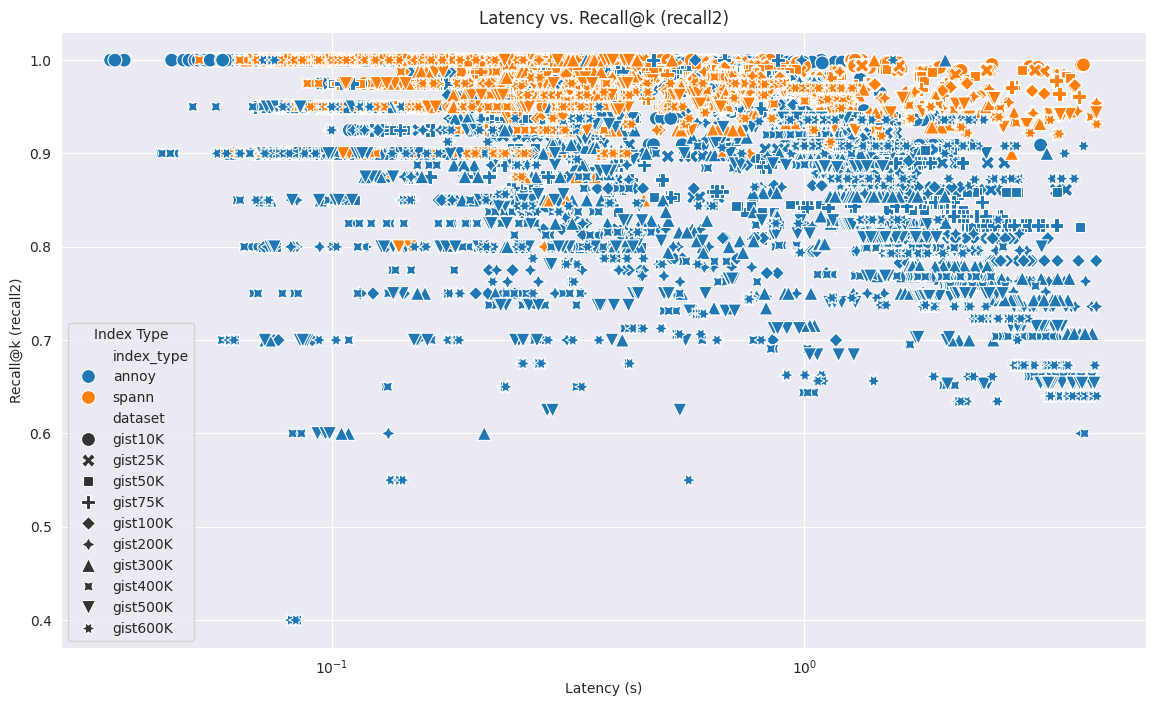

In [108]:
# Latency vs. Recall
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df, x='latency_(s)', y='recall2', hue='index_type', style='dataset', s=100)
plt.title('Latency vs. Recall@k (recall2)')
plt.xlabel('Latency (s)')
plt.ylabel('Recall@k (recall2)')
plt.legend(title='Index Type')
plt.xscale('log')
plt.show()

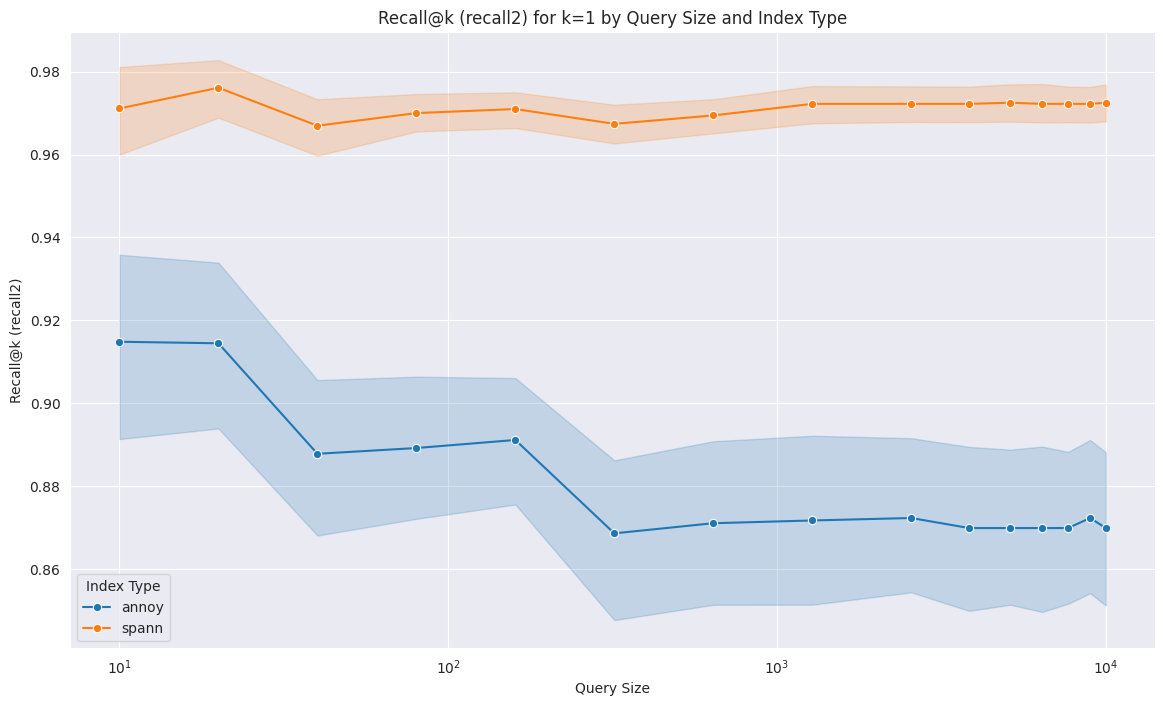

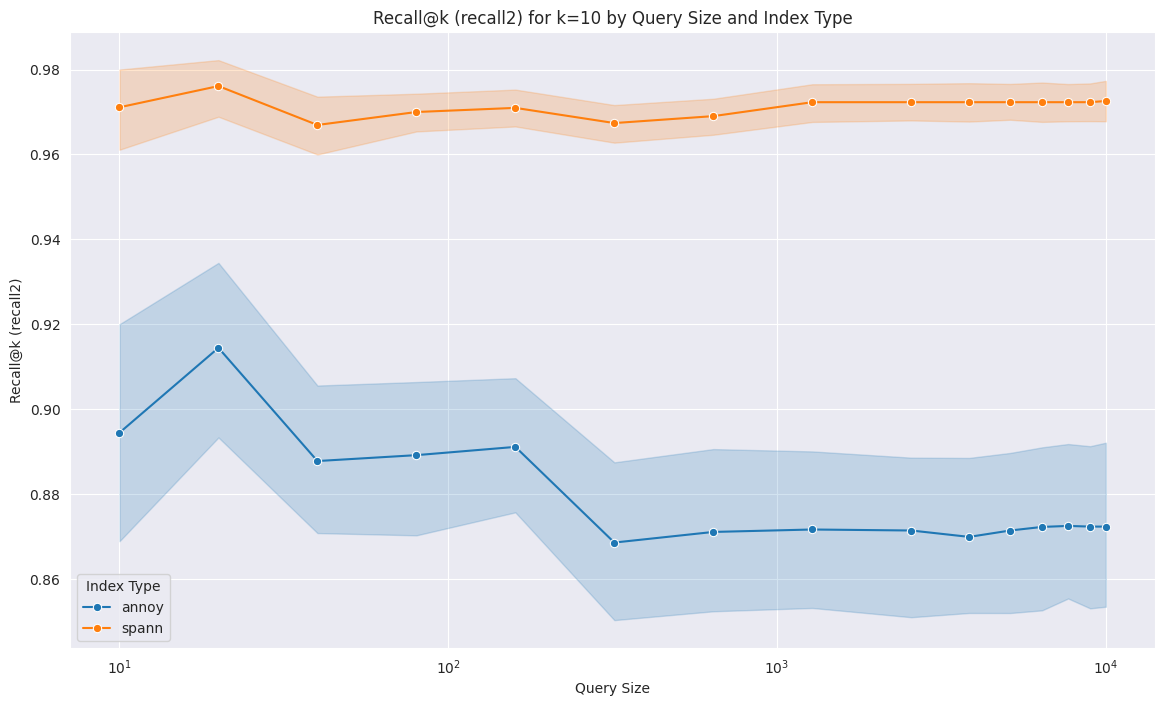

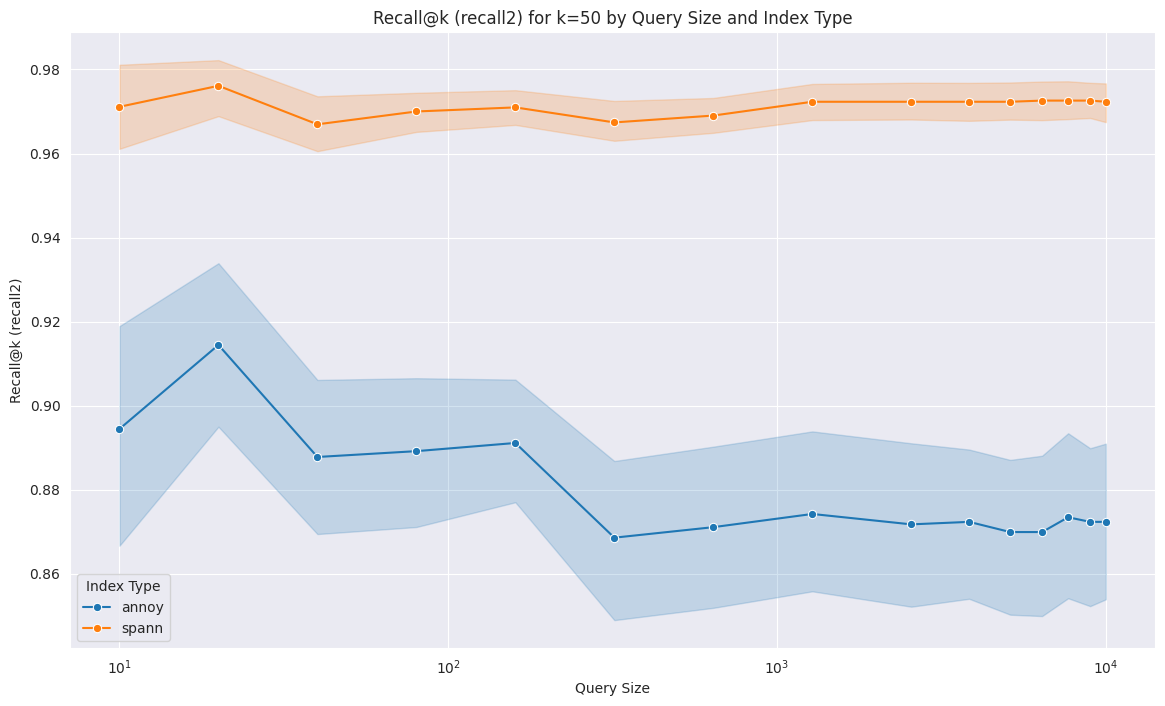

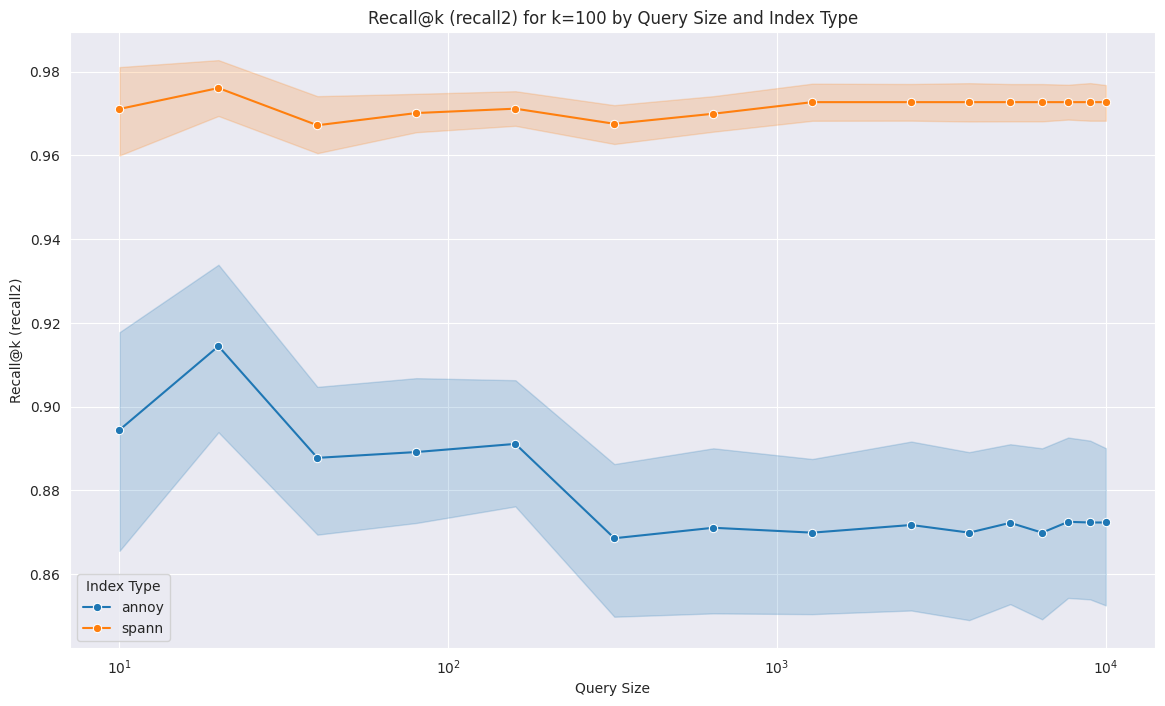

In [109]:
# Recall vs. Query Size for different k-values
for k in df['k'].unique():
    subset = df[df['k'] == k]
    plt.figure(figsize=(14, 8))
    sns.lineplot(data=subset, x='query_size', y='recall2', hue='index_type', marker='o')
    plt.title(f'Recall@k (recall2) for k={k} by Query Size and Index Type')
    plt.xlabel('Query Size')
    plt.ylabel('Recall@k (recall2)')
    plt.legend(title='Index Type')
    plt.xscale('log')
    plt.show()

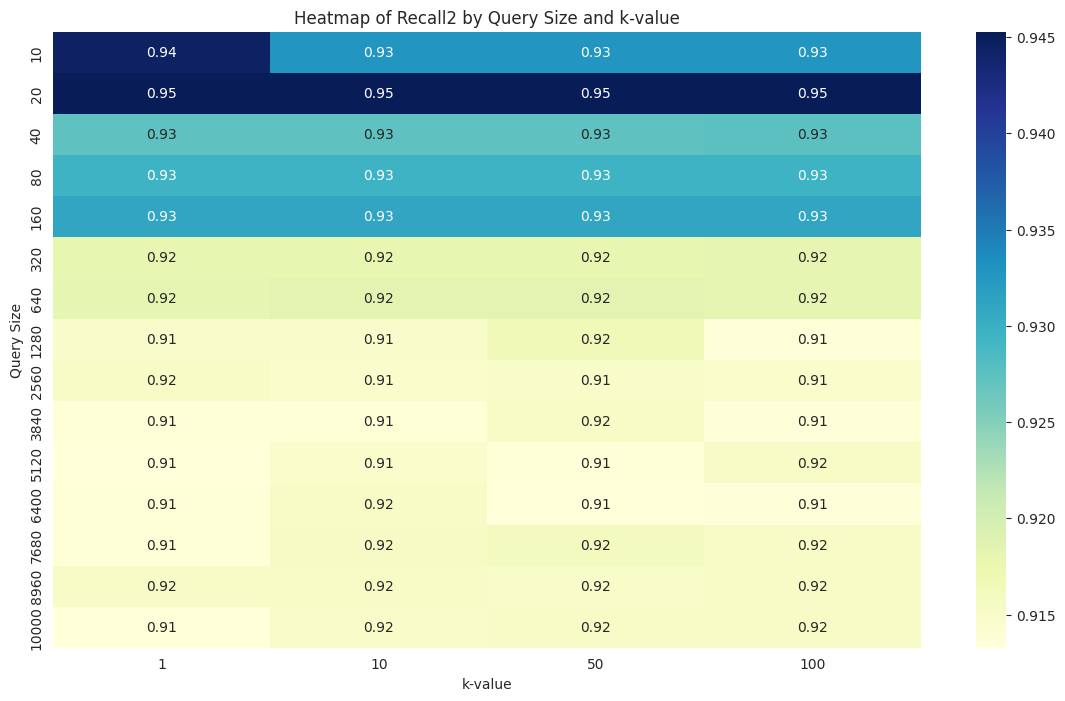

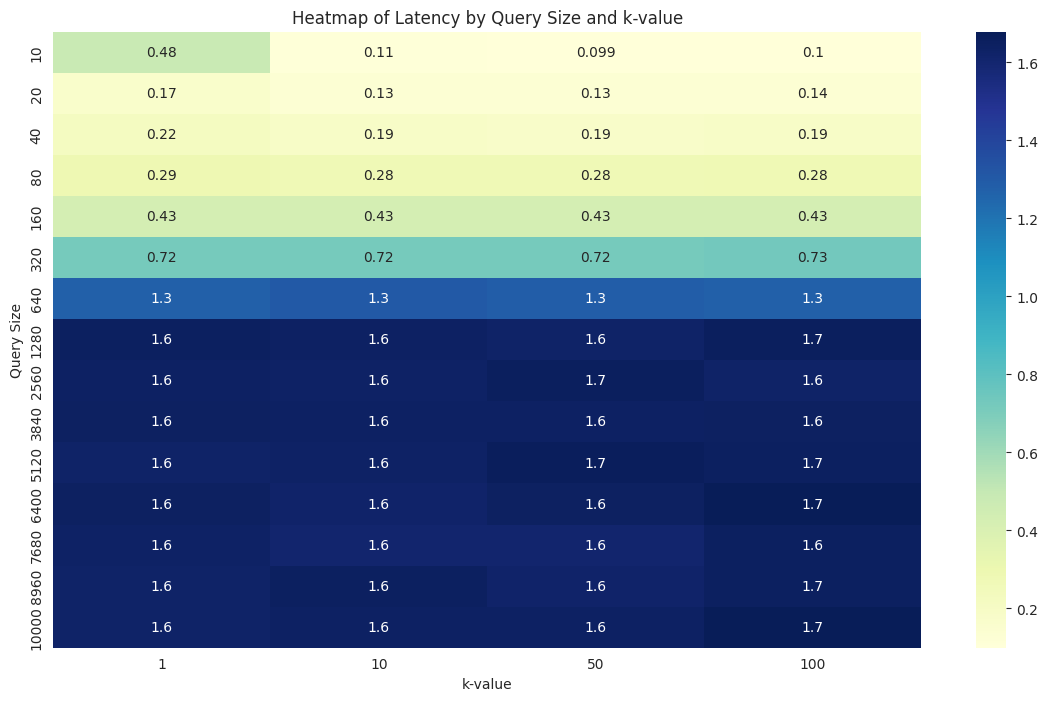

In [110]:
# Heatmap of recall2 by query size and k-value
pivot_recall2 = df.pivot_table(index="query_size", columns="k", values="recall2", aggfunc='mean')
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_recall2, annot=True, cmap="YlGnBu")
plt.title('Heatmap of Recall2 by Query Size and k-value')
plt.xlabel('k-value')
plt.ylabel('Query Size')
plt.show()

# Heatmap of latency by query size and k-value
pivot_latency = df.pivot_table(index="query_size", columns="k", values="latency_(s)", aggfunc='mean')
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_latency, annot=True, cmap="YlGnBu")
plt.title('Heatmap of Latency by Query Size and k-value')
plt.xlabel('k-value')
plt.ylabel('Query Size')
plt.show()

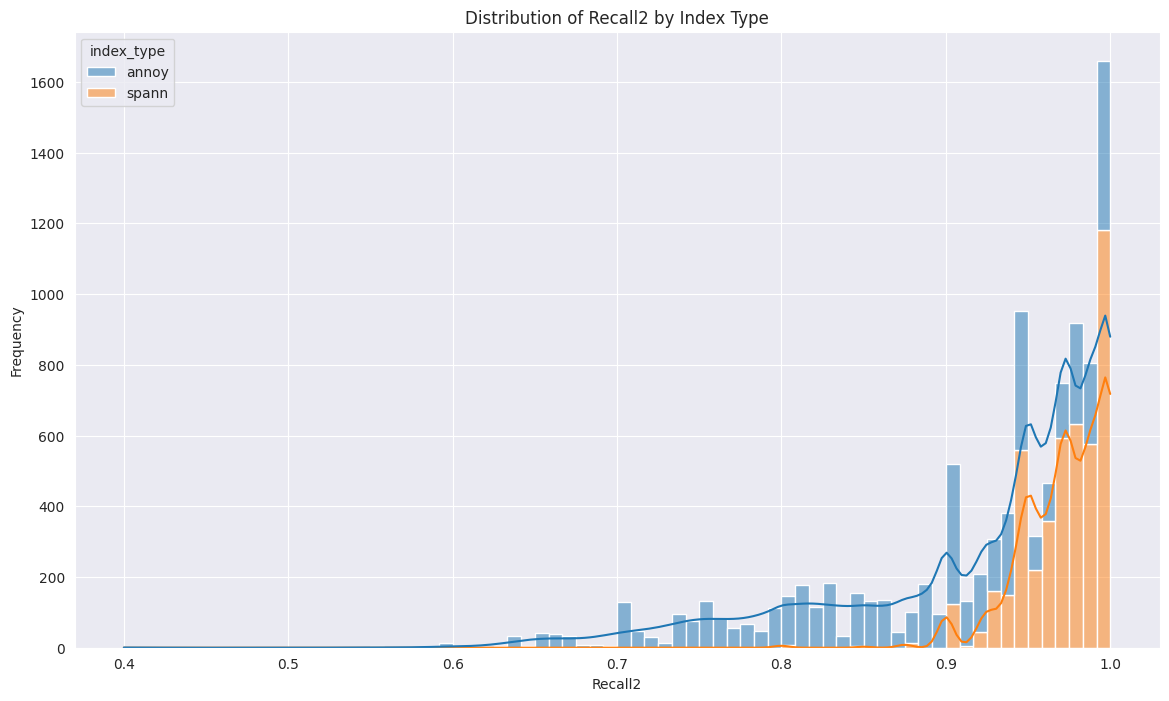

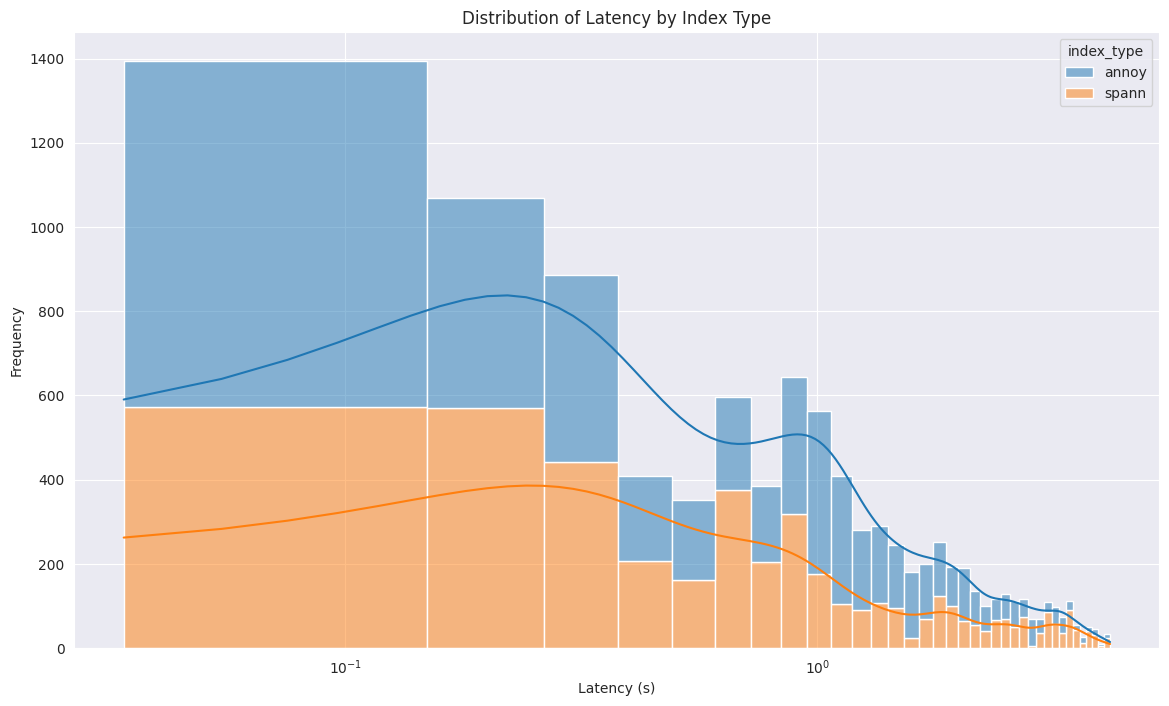

In [111]:
# Distribution Analysis
plt.figure(figsize=(14, 8))
sns.histplot(data=df, x='recall2', hue='index_type', multiple='stack', kde=True)
plt.title('Distribution of Recall2 by Index Type')
plt.xlabel('Recall2')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(14, 8))
sns.histplot(data=df, x='latency_(s)', hue='index_type', multiple='stack', kde=True)
plt.title('Distribution of Latency by Index Type')
plt.xlabel('Latency (s)')
plt.ylabel('Frequency')
plt.xscale('log')
plt.show()

In [112]:
# Pivot Tables
pivot_table_recall2 = df.pivot_table(values='recall2', index='dataset', columns='index_type', aggfunc='mean')
pivot_table_latency = df.pivot_table(values='latency_(s)', index='dataset', columns='index_type', aggfunc='mean')

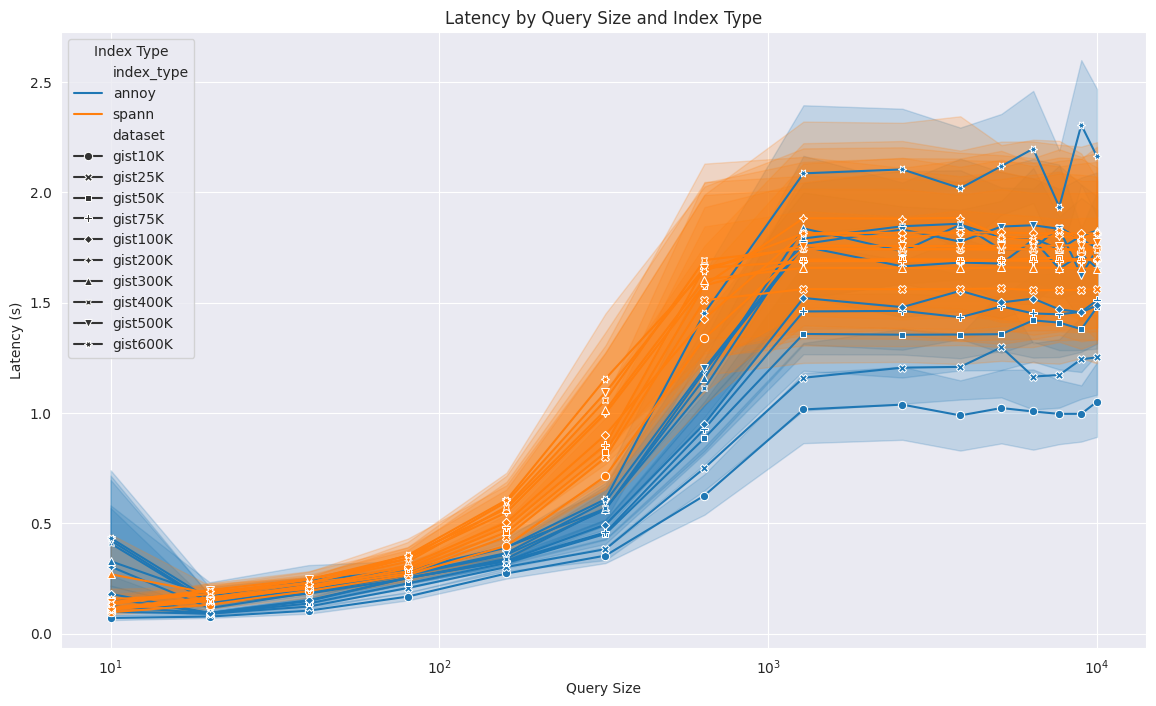

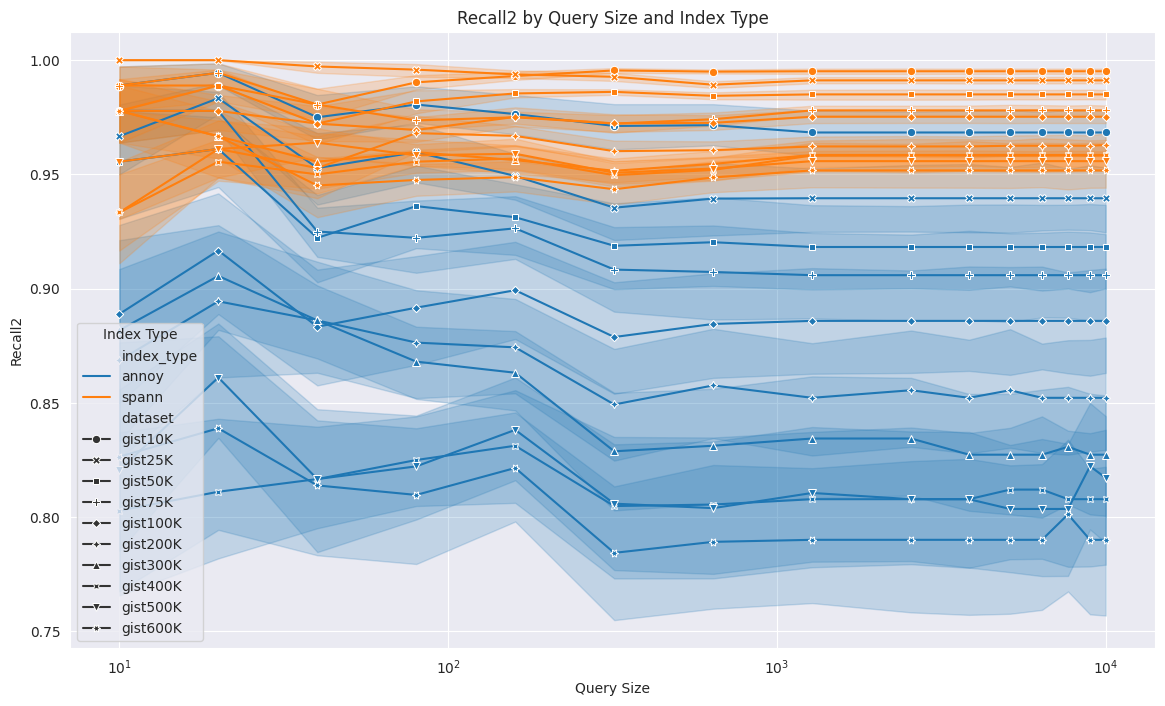

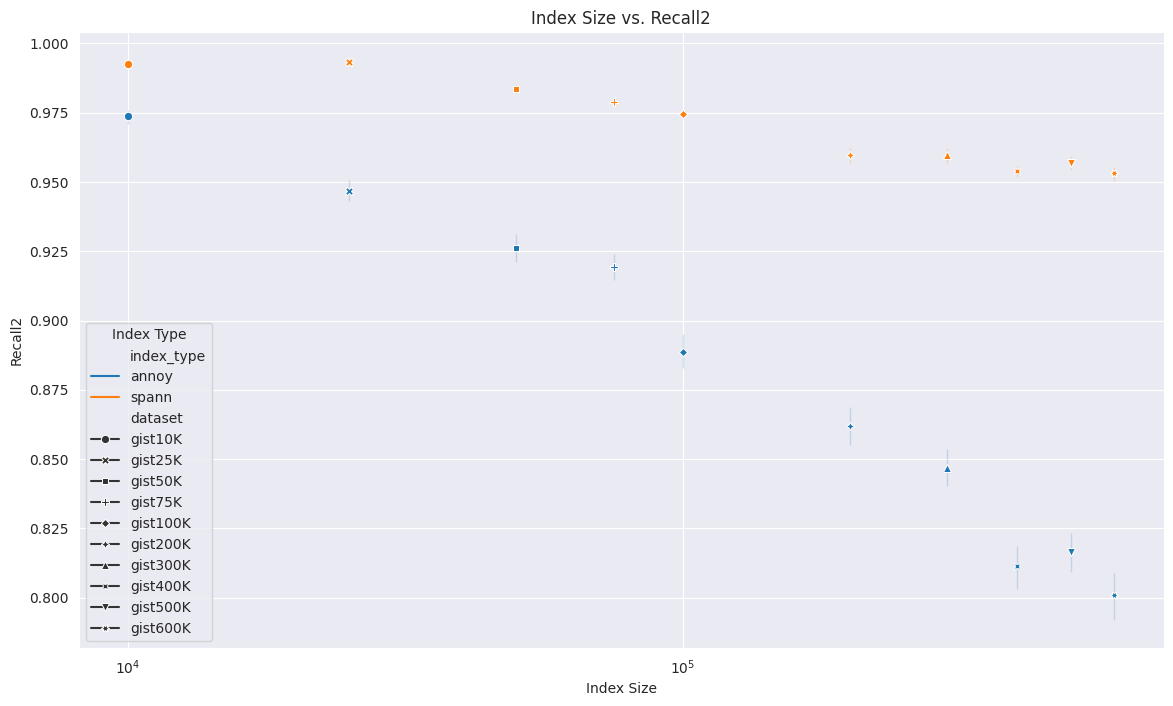

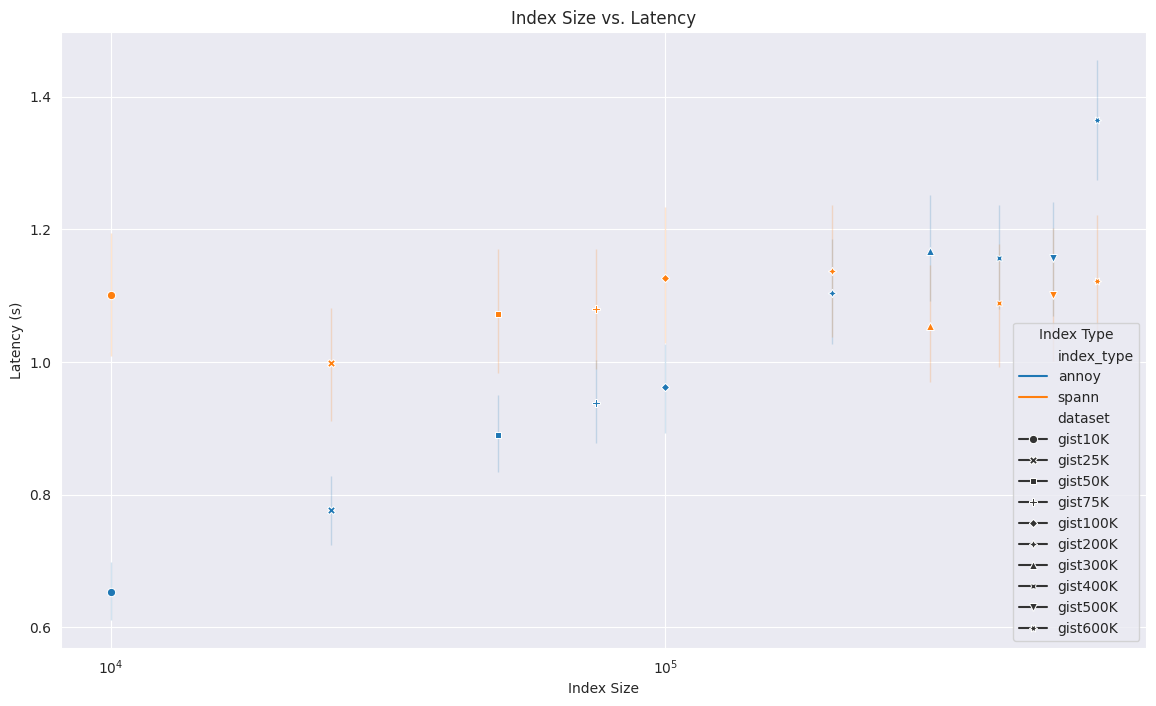

In [113]:
# Performance by Query Size
plt.figure(figsize=(14, 8))
sns.lineplot(data=df, x='query_size', y='latency_(s)', hue='index_type', style='dataset', markers=True, dashes=False)
plt.title('Latency by Query Size and Index Type')
plt.xlabel('Query Size')
plt.ylabel('Latency (s)')
plt.legend(title='Index Type')
plt.xscale('log')
plt.show()

plt.figure(figsize=(14, 8))
sns.lineplot(data=df, x='query_size', y='recall2', hue='index_type', style='dataset', markers=True, dashes=False)
plt.title('Recall2 by Query Size and Index Type')
plt.xlabel('Query Size')
plt.ylabel('Recall2')
plt.legend(title='Index Type')
plt.xscale('log')
plt.show()

# Index Size Impact
plt.figure(figsize=(14, 8))
sns.lineplot(data=df, x='index_size', y='recall2', hue='index_type', style='dataset',  markers=True, dashes=False)
plt.title('Index Size vs. Recall2')
plt.xlabel('Index Size')
plt.ylabel('Recall2')
plt.legend(title='Index Type')
plt.xscale('log')
plt.show()

plt.figure(figsize=(14, 8))
sns.lineplot(data=df, x='index_size', y='latency_(s)', hue='index_type', style='dataset',  markers=True, dashes=False)
plt.title('Index Size vs. Latency')
plt.xlabel('Index Size')
plt.ylabel('Latency (s)')
plt.legend(title='Index Type')
plt.xscale('log')
plt.show()

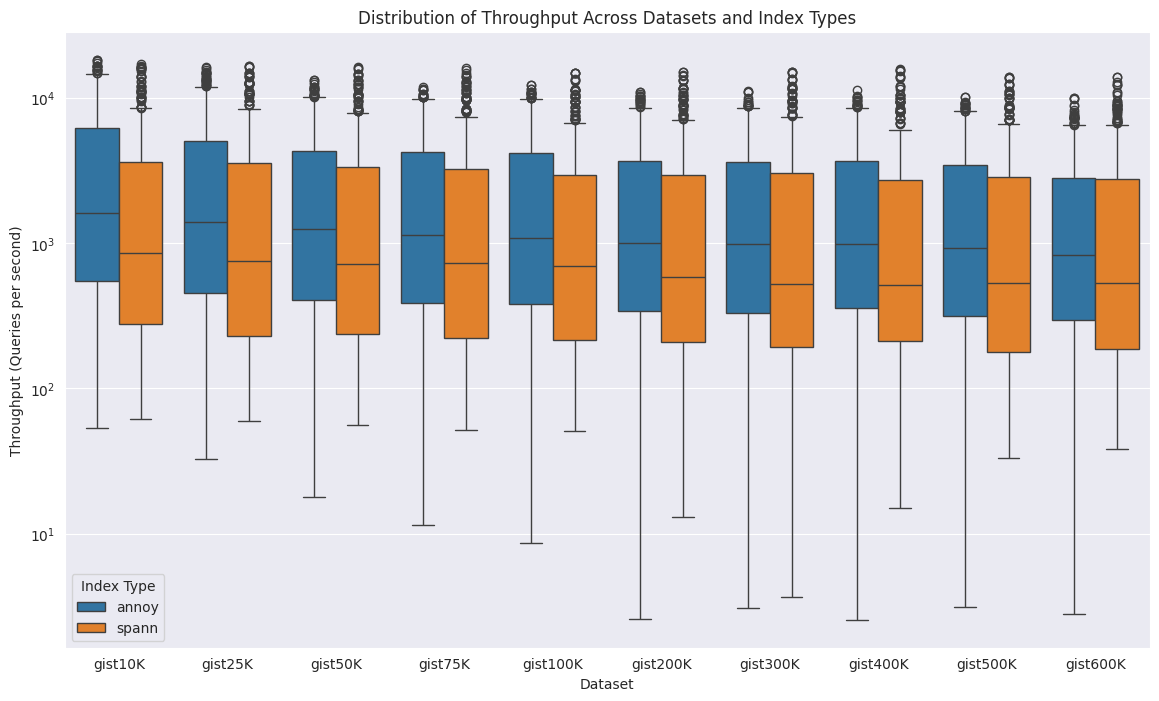

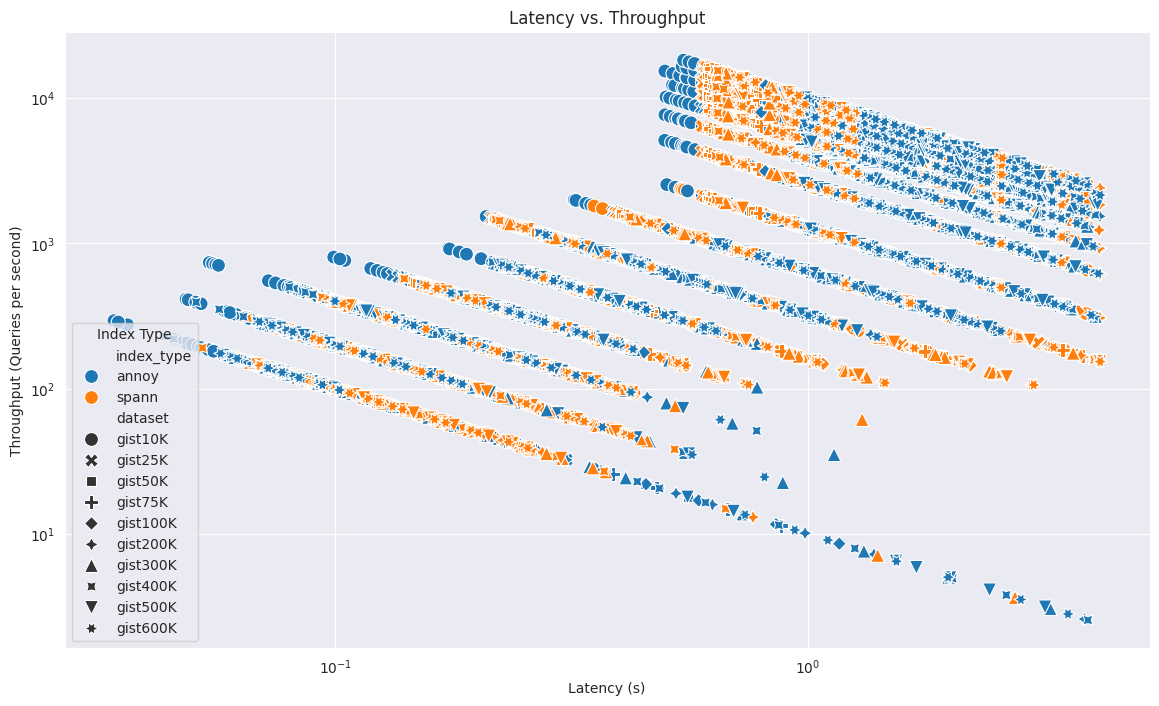

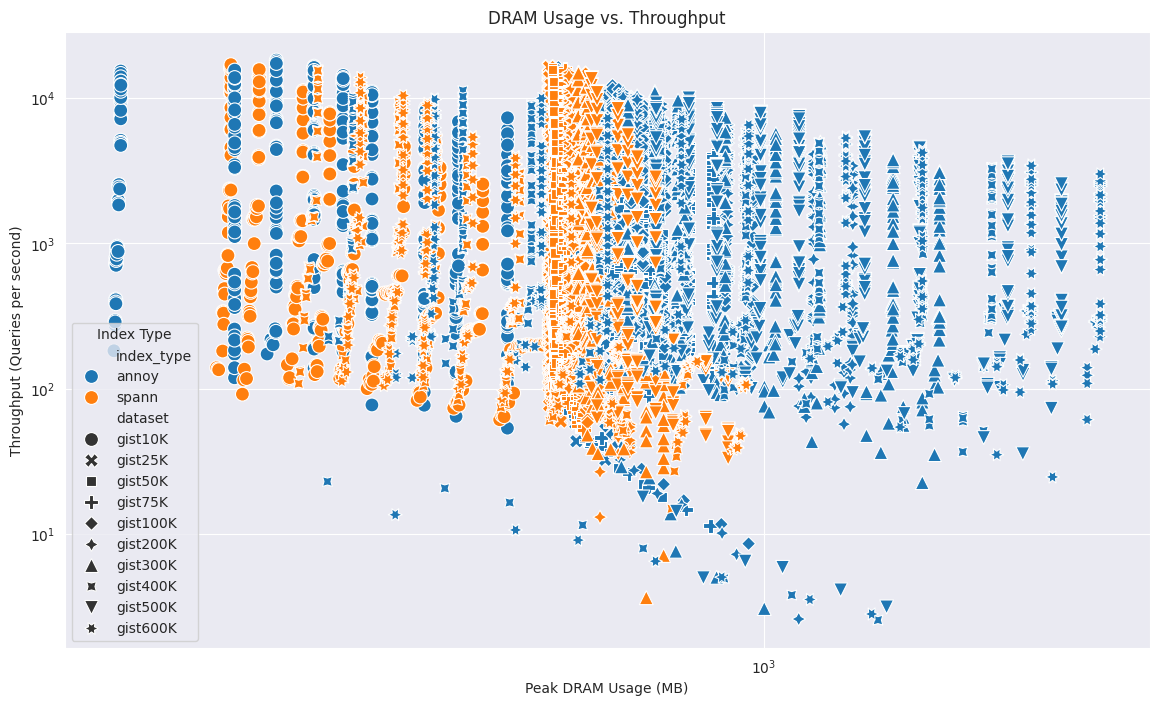

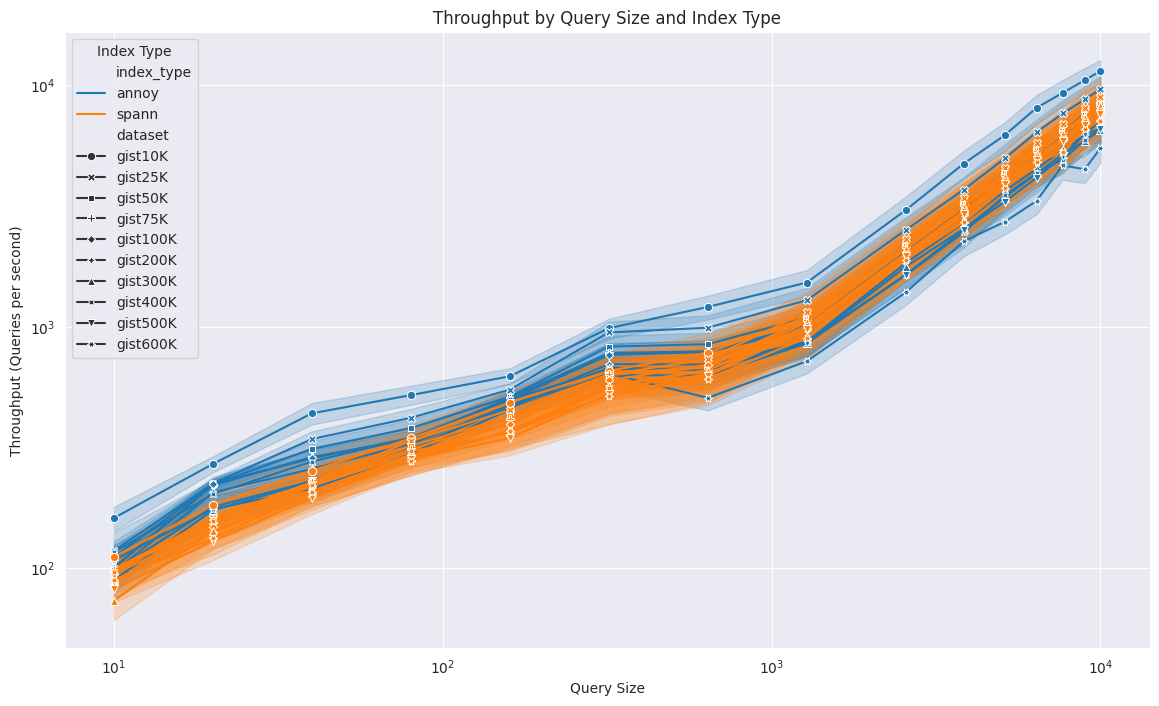

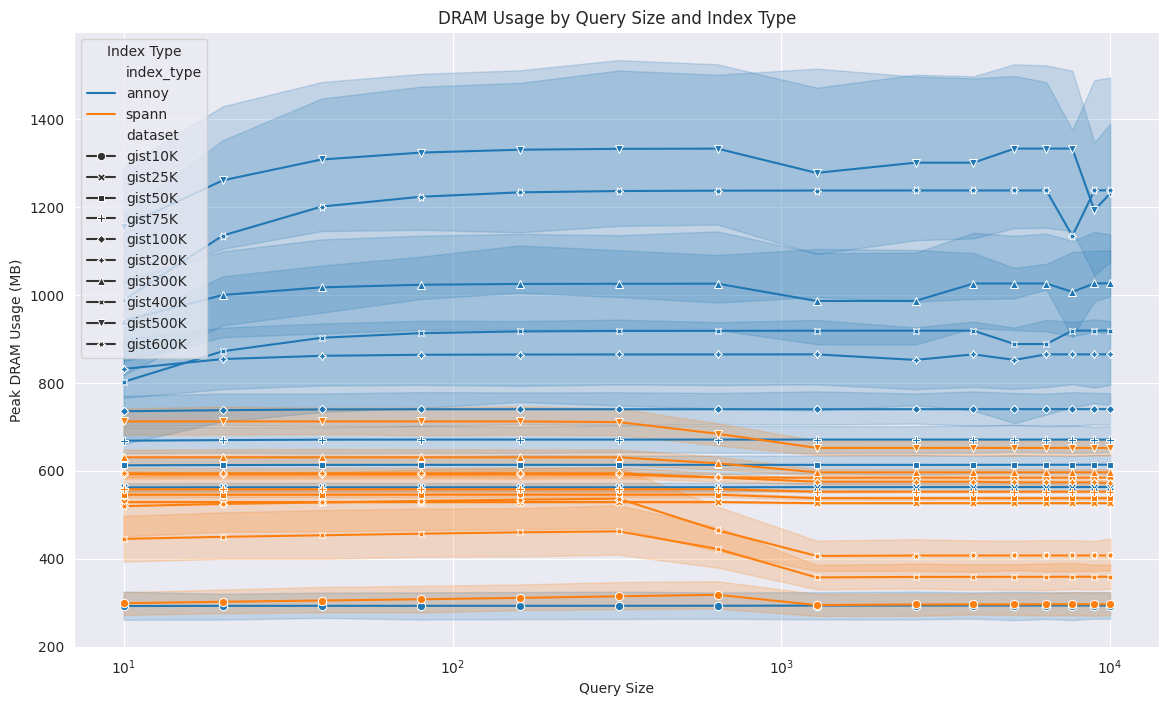

In [114]:
# Throughput calculation
df['throughput'] = df['query_size'] / df['latency_(s)']

# Distribution of throughput across different datasets and index types
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='dataset', y='throughput', hue='index_type')
plt.title('Distribution of Throughput Across Datasets and Index Types')
plt.xlabel('Dataset')
plt.ylabel('Throughput (Queries per second)')
plt.legend(title='Index Type')
plt.yscale('log')
plt.show()

# Latency vs. Throughput
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df, x='latency_(s)', y='throughput', hue='index_type', style='dataset', s=100)
plt.title('Latency vs. Throughput')
plt.xlabel('Latency (s)')
plt.ylabel('Throughput (Queries per second)')
plt.legend(title='Index Type')
plt.xscale('log')
plt.yscale('log')
plt.show()

# DRAM usage vs. Throughput
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df, x='peak_dram_(MB)', y='throughput', hue='index_type', style='dataset', s=100)
plt.title('DRAM Usage vs. Throughput')
plt.xlabel('Peak DRAM Usage (MB)')
plt.ylabel('Throughput (Queries per second)')
plt.legend(title='Index Type')
plt.xscale('log')
plt.yscale('log')
plt.show()

# Throughput vs. Query Size
plt.figure(figsize=(14, 8))
sns.lineplot(data=df, x='query_size', y='throughput', hue='index_type', style='dataset', markers=True, dashes=False)
plt.title('Throughput by Query Size and Index Type')
plt.xlabel('Query Size')
plt.ylabel('Throughput (Queries per second)')
plt.legend(title='Index Type')
plt.xscale('log')
plt.yscale('log')
plt.show()

# DRAM usage by Query Size and Index Type
plt.figure(figsize=(14, 8))
sns.lineplot(data=df, x='query_size', y='peak_dram_(MB)', hue='index_type', style='dataset', markers=True, dashes=False)
plt.title('DRAM Usage by Query Size and Index Type')
plt.xlabel('Query Size')
plt.ylabel('Peak DRAM Usage (MB)')
plt.legend(title='Index Type')
plt.xscale('log')
plt.show()

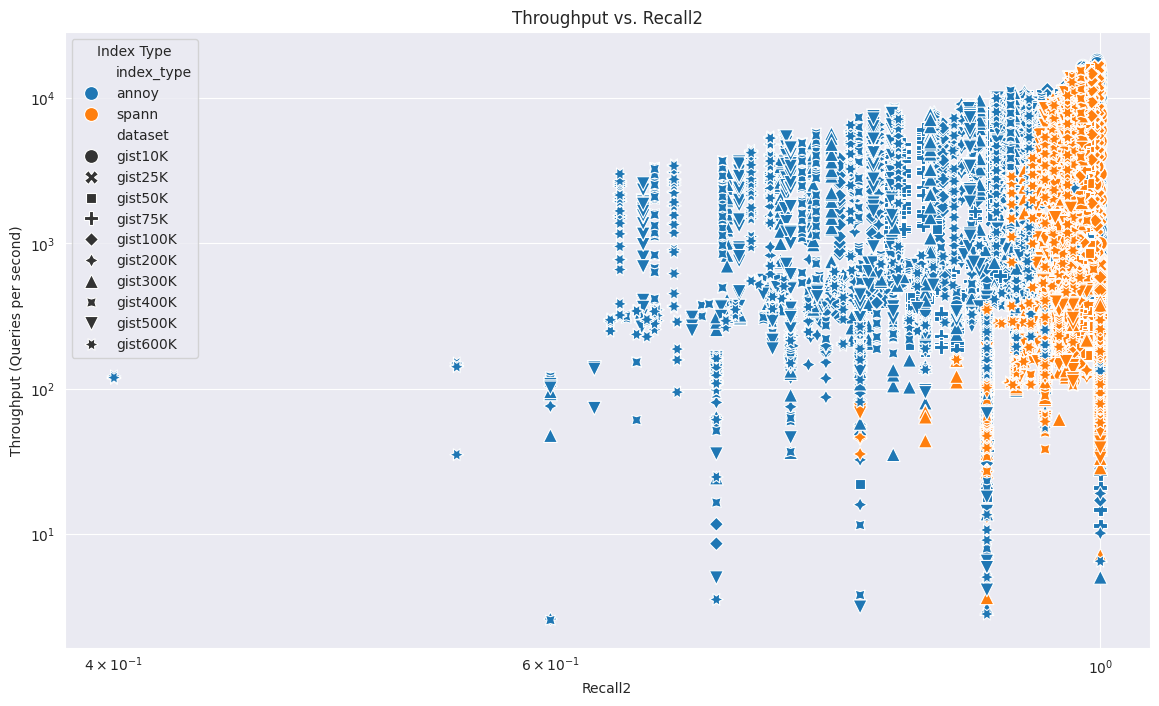

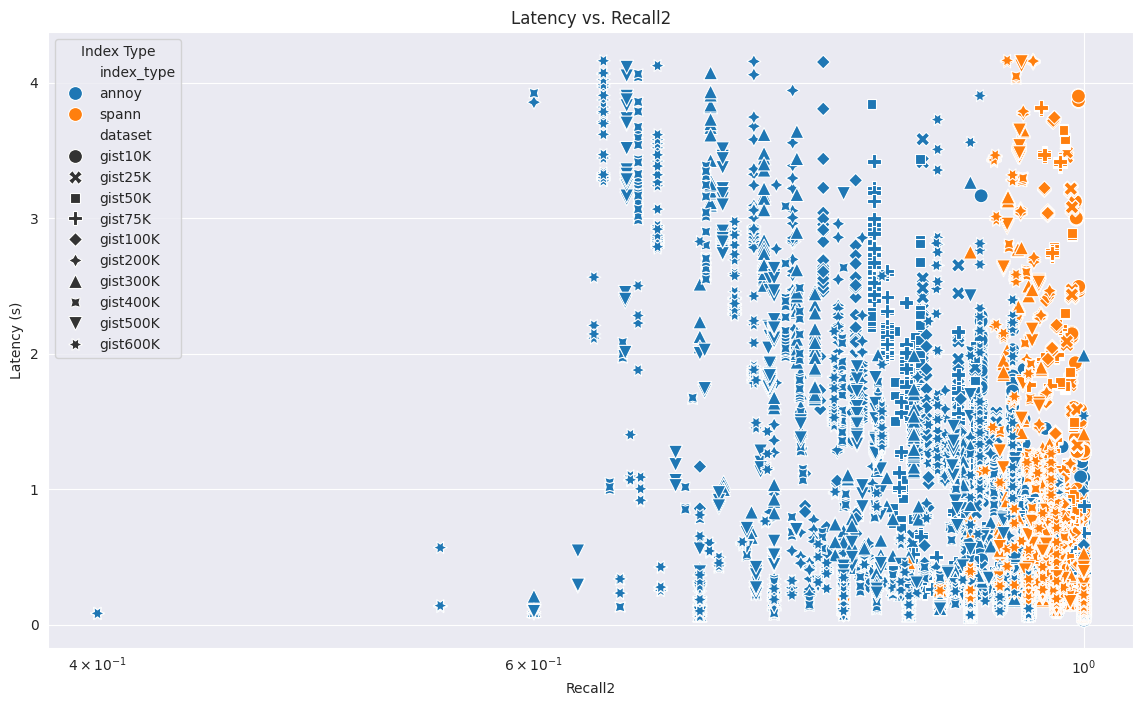

In [115]:
# Throughput vs. Recall2
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df, x='recall2', y='throughput', hue='index_type', style='dataset', s=100)
plt.title('Throughput vs. Recall2')
plt.xlabel('Recall2')
plt.ylabel('Throughput (Queries per second)')
plt.legend(title='Index Type')
plt.xscale('log')
plt.yscale('log')
plt.show()

# Latency vs. Recall2
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df, x='recall2', y='latency_(s)', hue='index_type', style='dataset', s=100)
plt.title('Latency vs. Recall2')
plt.xlabel('Recall2')
plt.ylabel('Latency (s)')
plt.legend(title='Index Type')
plt.xscale('log')
plt.show()

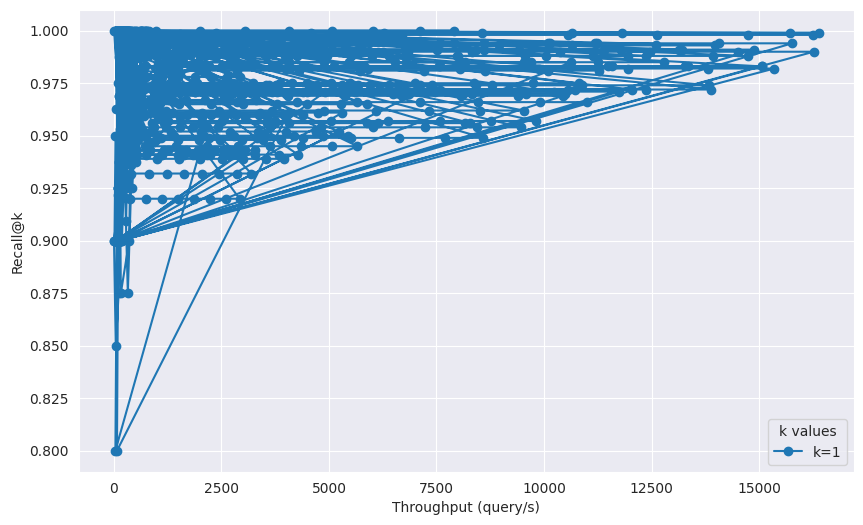

In [116]:
plt.figure(figsize=(10, 6))

# for k in df['k'].unique():
k = 1
spann = df[df['index_type'] == 'spann']
subset = spann[spann['k'] == k]
plt.plot(subset['throughput'], subset['recall2'], marker='o', label=f'k={k}')

plt.xlabel('Throughput (query/s)')
plt.ylabel('Recall@k')
# plt.title('SPANN Throughput vs Recall@k')
plt.grid(True)
plt.legend(title='k values')
plt.show()

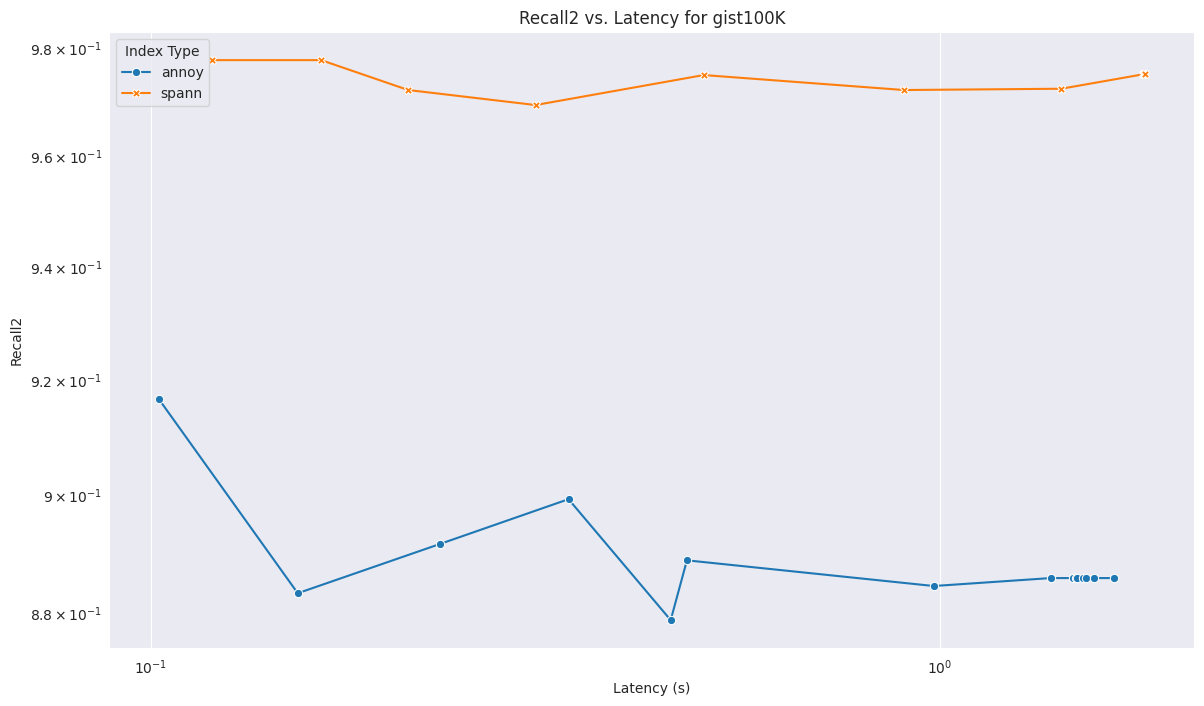

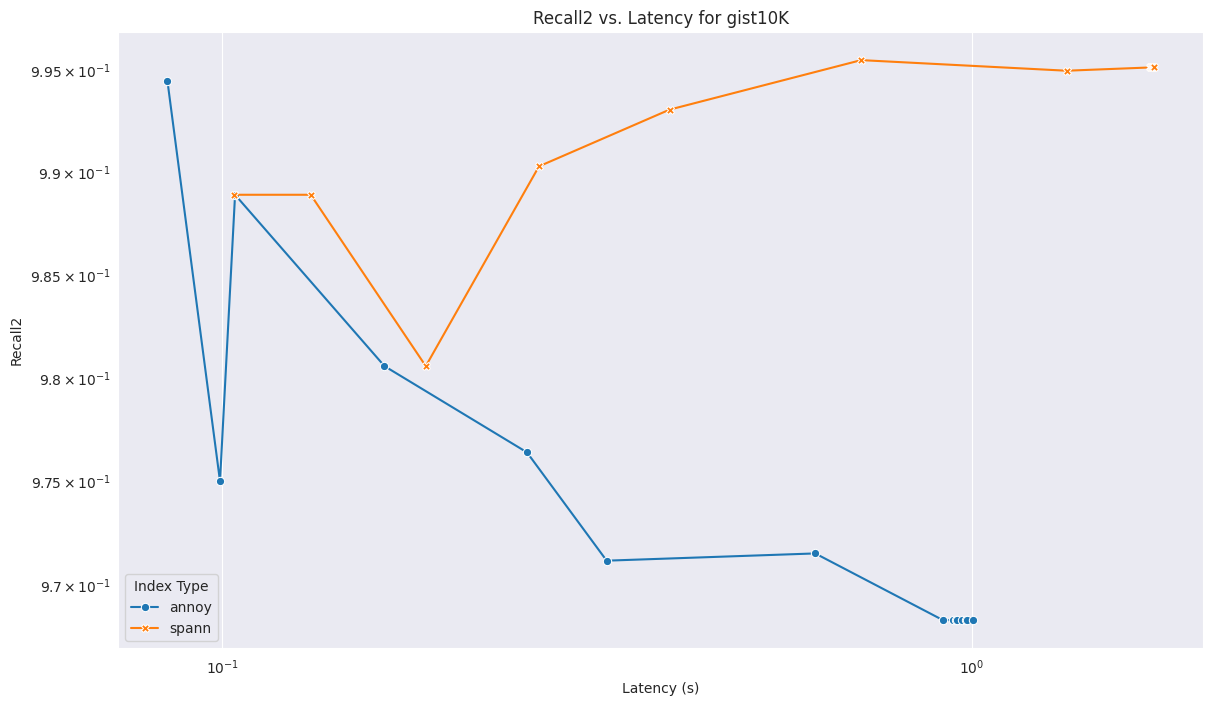

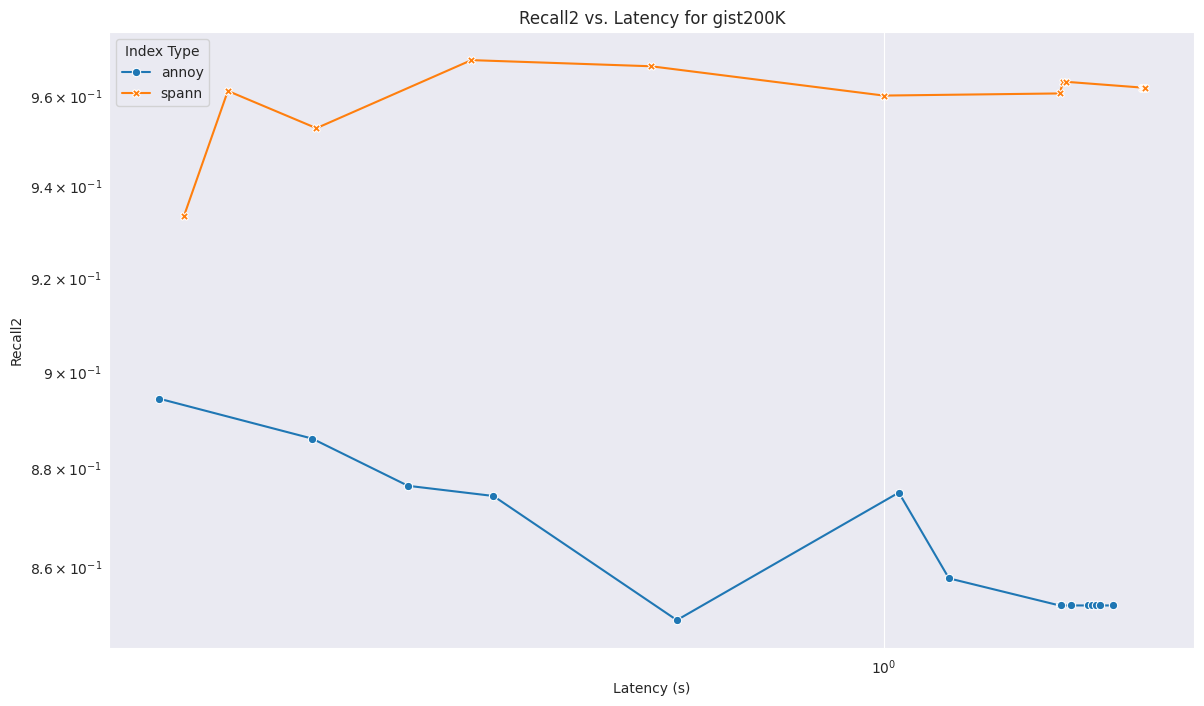

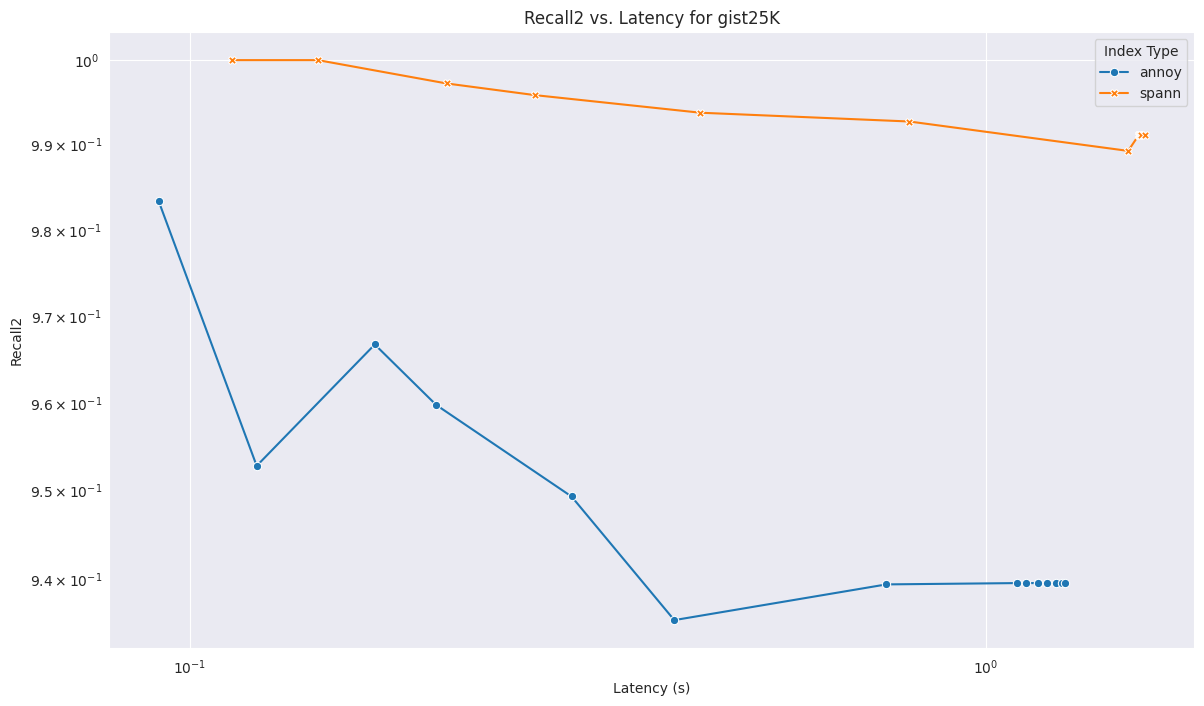

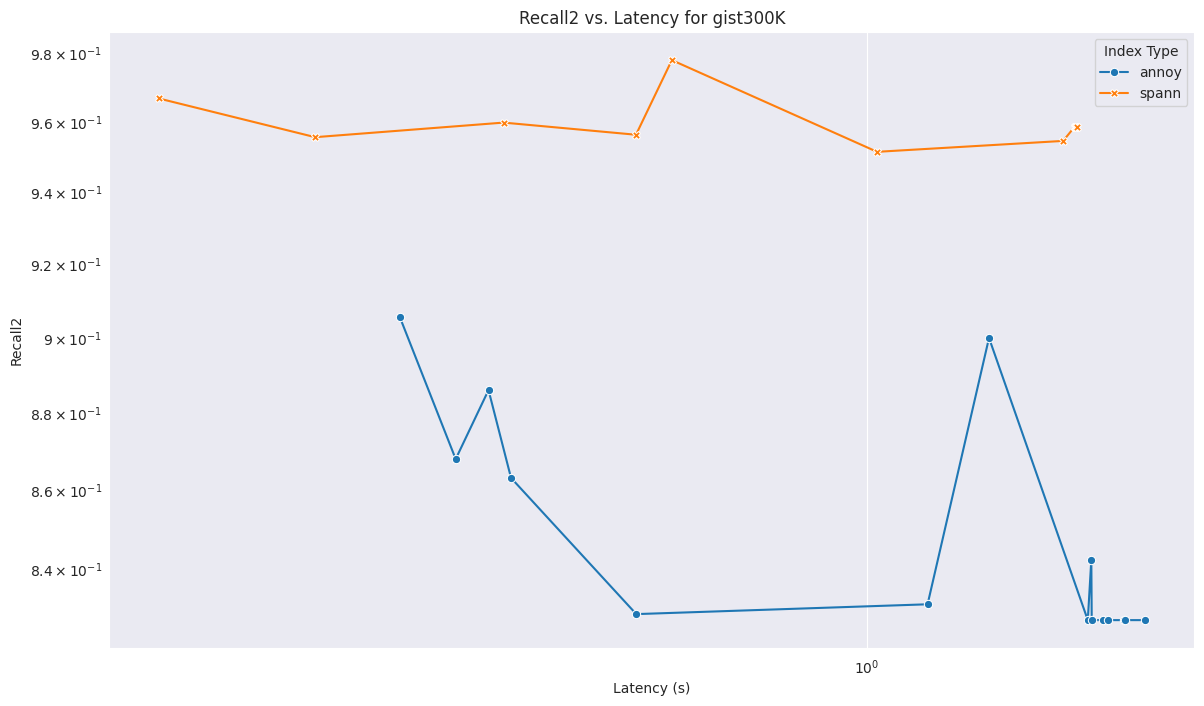

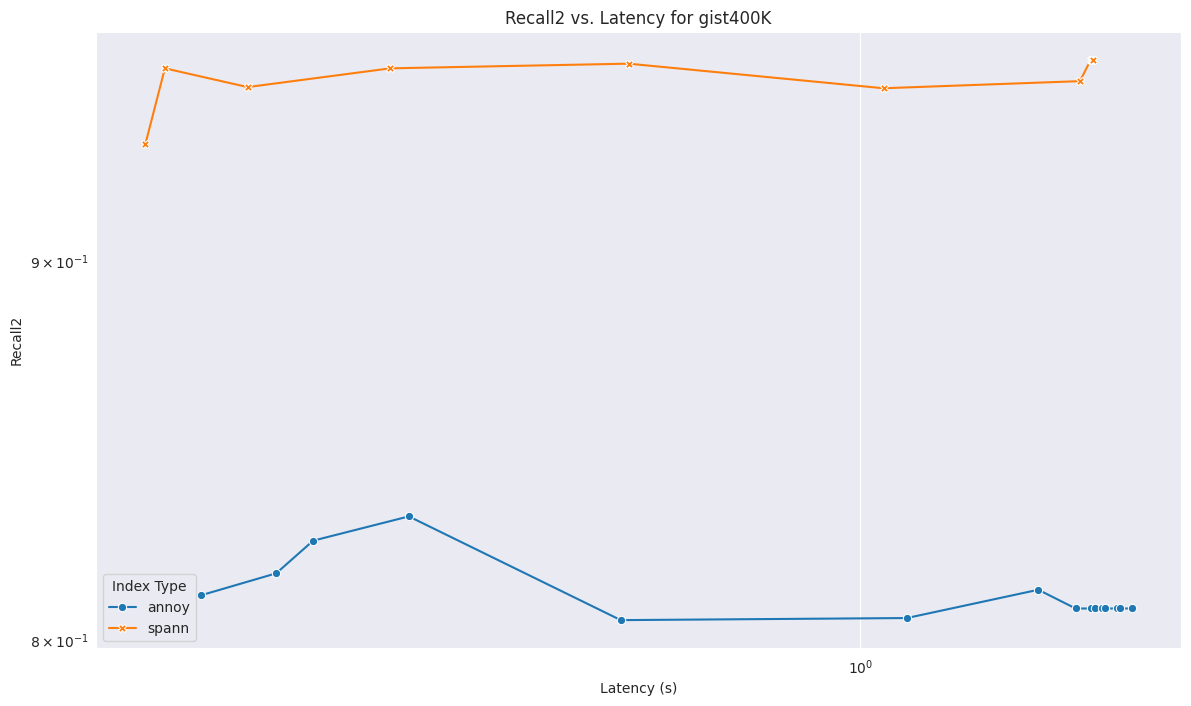

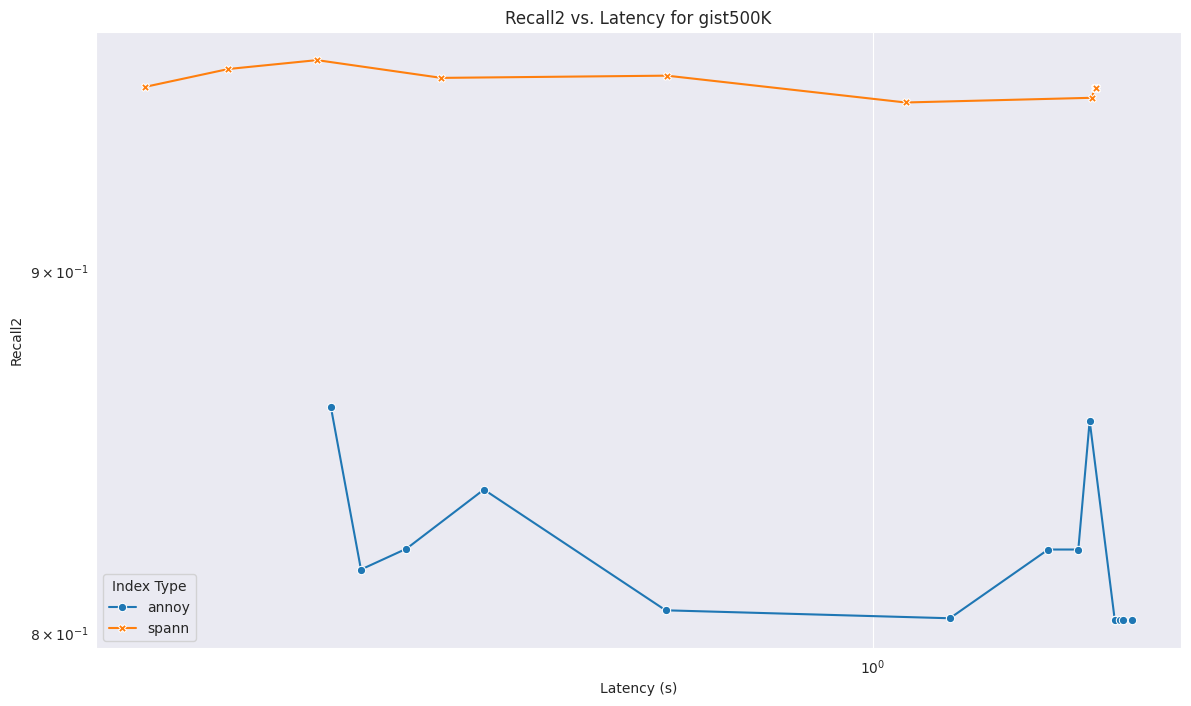

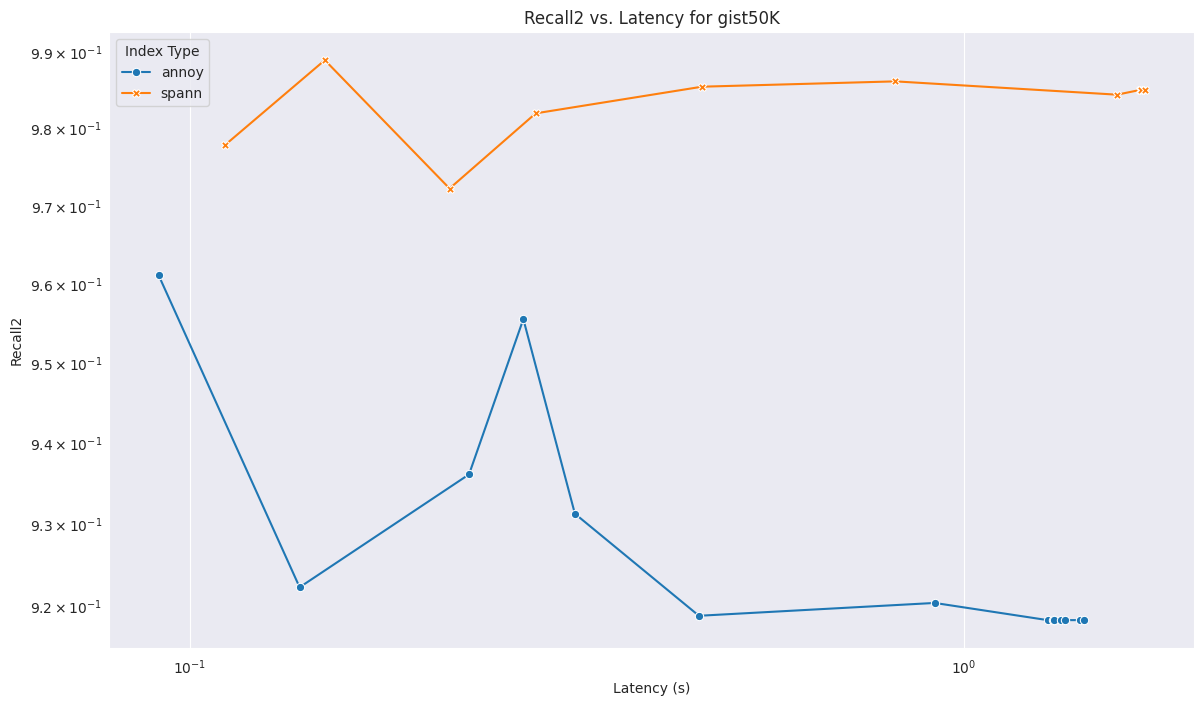

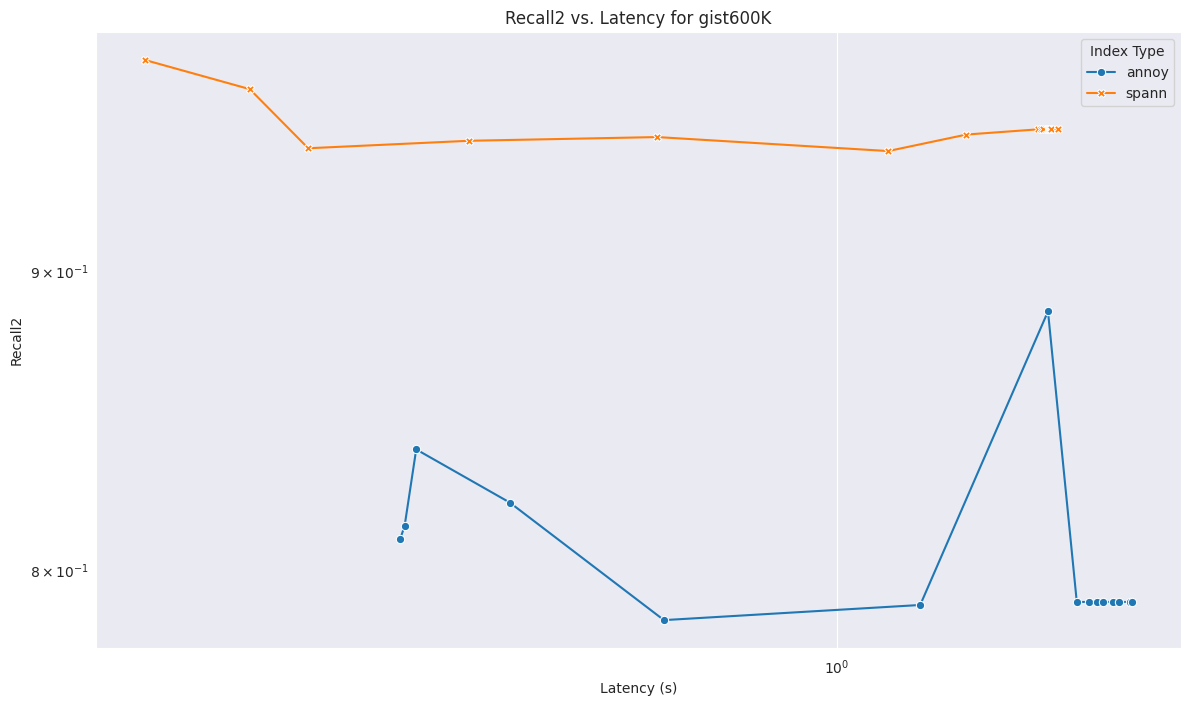

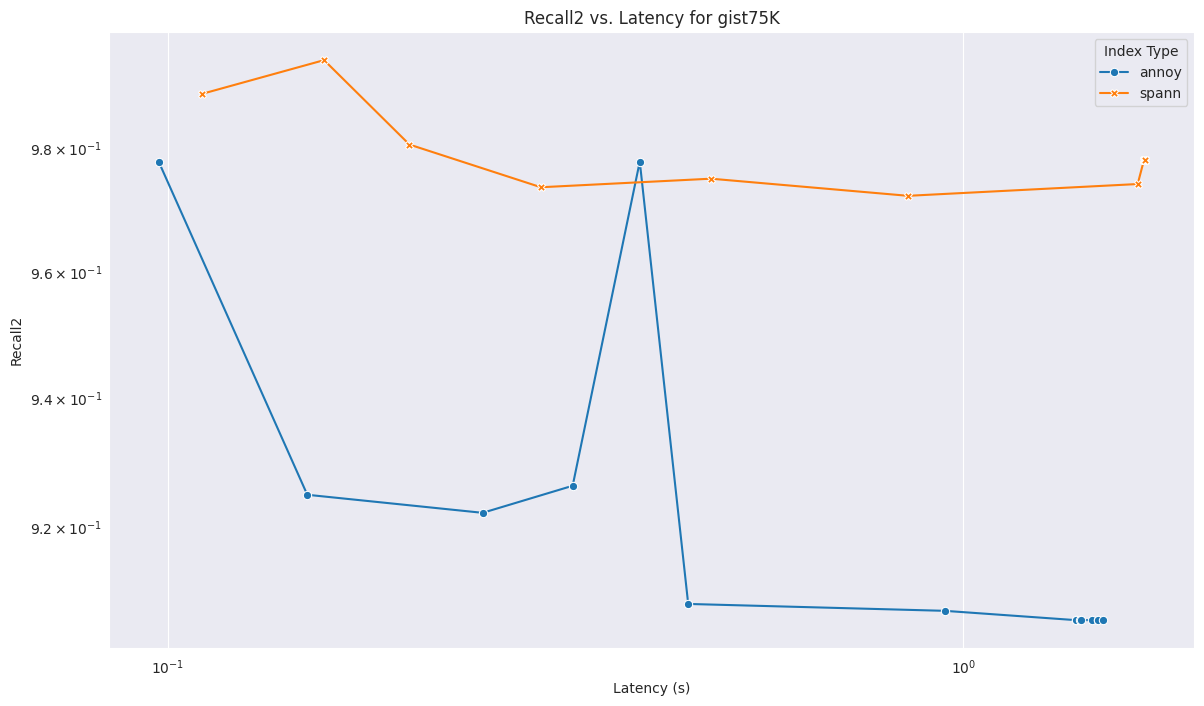

In [117]:

# Throughput calculation
df = df[df['k'] == 1]
df['throughput'] = df['query_size'] / df['latency_(s)']

# Aggregate the data
df_agg = df.groupby(['dataset', 'index_type', 'k', 'query_size']).agg({
    'recall2': 'mean',
    'latency_(s)': 'mean',
    'throughput': 'mean',
    'peak_dram_(MB)': 'mean'
}).reset_index()

# Normalize the data (if necessary)
# df_agg['latency_(s)'] = np.log(df_agg['latency_(s)'])
# df_agg['recall2'] = np.log(df_agg['recall2'])

# Create combined plots for recall vs. latency comparing different algorithms
datasets = df_agg['dataset'].unique()

for dataset in datasets:
    subset = df_agg[df_agg['dataset'] == dataset]
    
    if not subset.empty:
        plt.figure(figsize=(14, 8))
        sns.lineplot(data=subset, y='recall2', x='latency_(s)', hue='index_type', style='index_type', markers=True, dashes=False)
        plt.title(f'Recall2 vs. Latency for {dataset}')
        plt.xlabel('Latency (s)')
        plt.ylabel('Recall2')
        plt.legend(title='Index Type')
        plt.xscale('log')
        plt.yscale('log')
        plt.show()

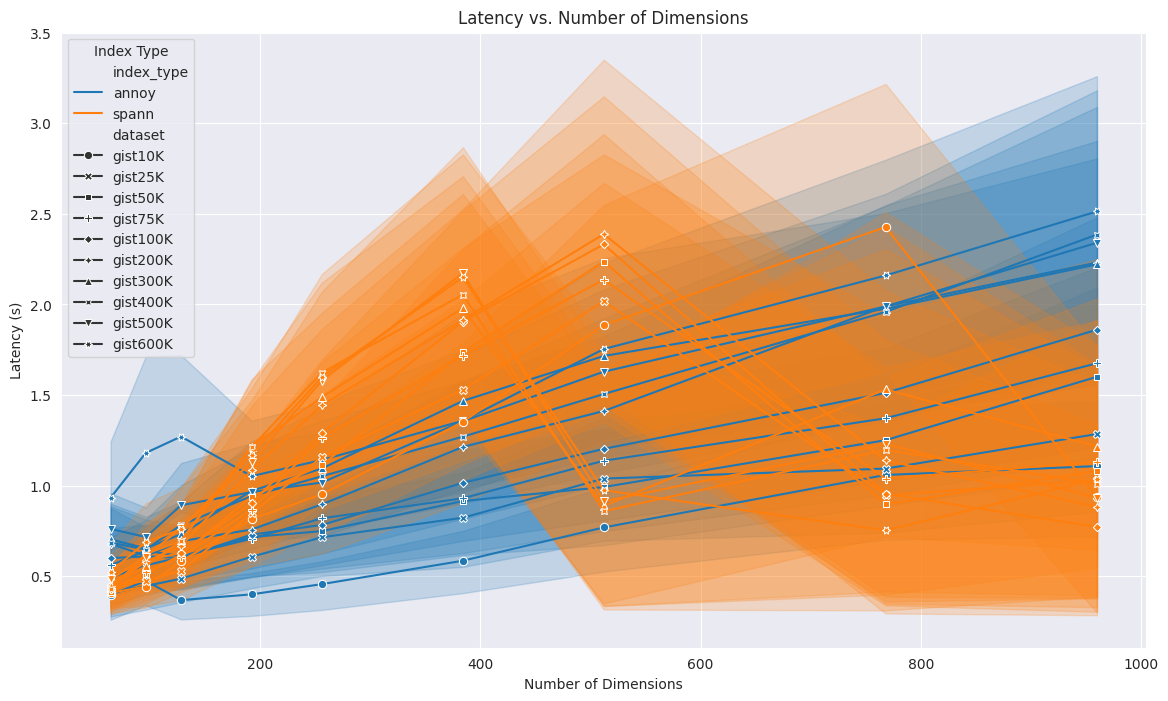

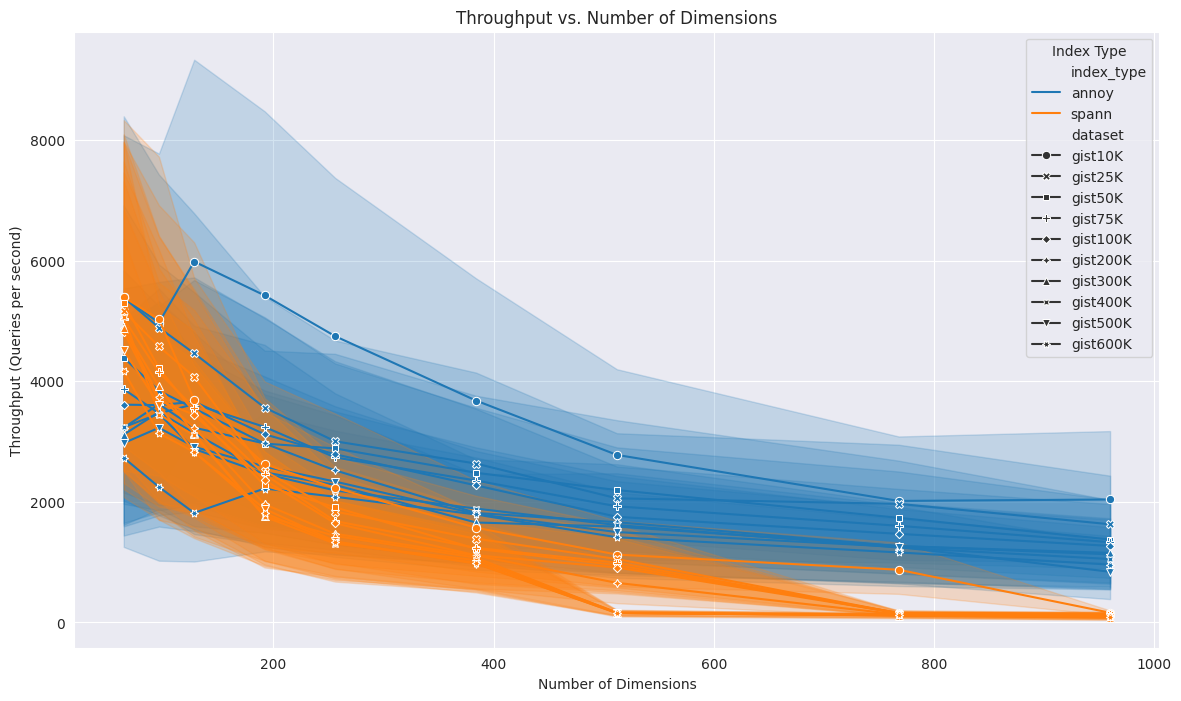

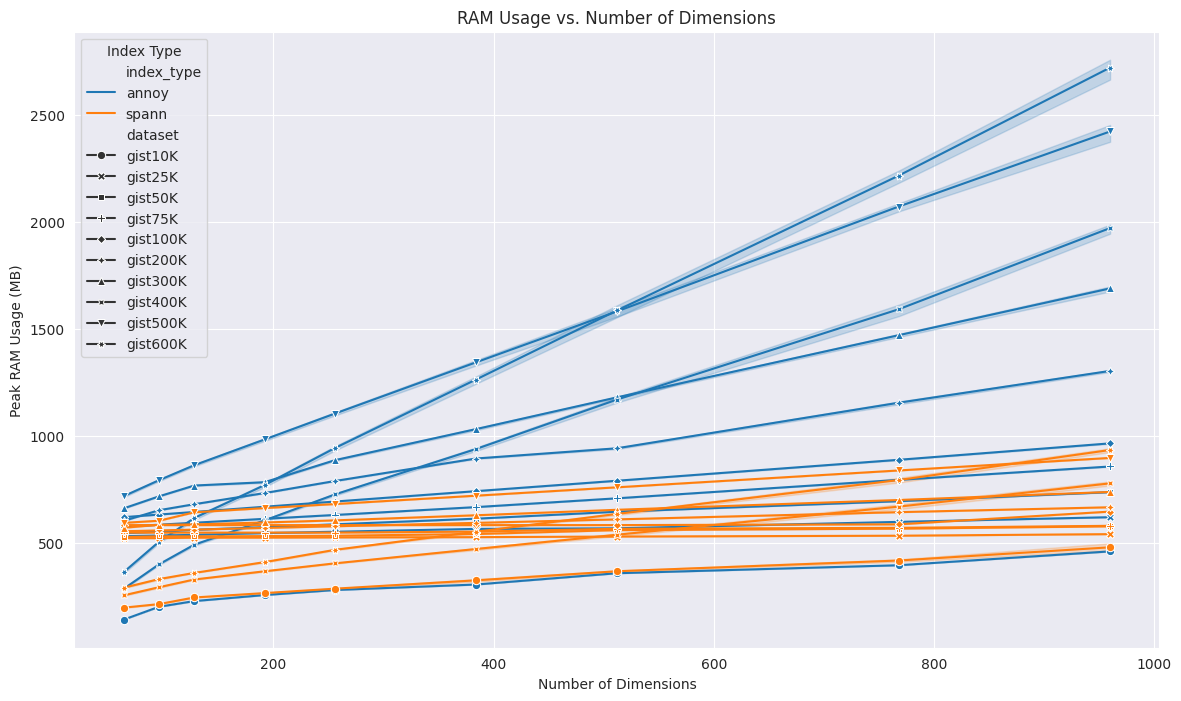

In [118]:
# Calculate throughput
df['throughput'] = df['query_size'] / df['latency_(s)']

# Filter the dataset to include only relevant columns
df_filtered = df[['dataset', 'index_type', 'dims', 'latency_(s)', 'throughput', 'peak_dram_(MB)']]

# Plot Latency vs. Number of Dimensions
plt.figure(figsize=(14, 8))
sns.lineplot(data=df_filtered, x='dims', y='latency_(s)', hue='index_type', style='dataset', markers=True, dashes=False)
plt.title('Latency vs. Number of Dimensions')
plt.xlabel('Number of Dimensions')
plt.ylabel('Latency (s)')
plt.legend(title='Index Type')
plt.show()

# Plot Throughput vs. Number of Dimensions
plt.figure(figsize=(14, 8))
sns.lineplot(data=df_filtered, x='dims', y='throughput', hue='index_type', style='dataset', markers=True, dashes=False)
plt.title('Throughput vs. Number of Dimensions')
plt.xlabel('Number of Dimensions')
plt.ylabel('Throughput (Queries per second)')
plt.legend(title='Index Type')
plt.show()

# Plot RAM Usage vs. Number of Dimensions
plt.figure(figsize=(14, 8))
sns.lineplot(data=df_filtered, x='dims', y='peak_dram_(MB)', hue='index_type', style='dataset', markers=True, dashes=False)
plt.title('RAM Usage vs. Number of Dimensions')
plt.xlabel('Number of Dimensions')
plt.ylabel('Peak RAM Usage (MB)')
plt.legend(title='Index Type')
plt.show()

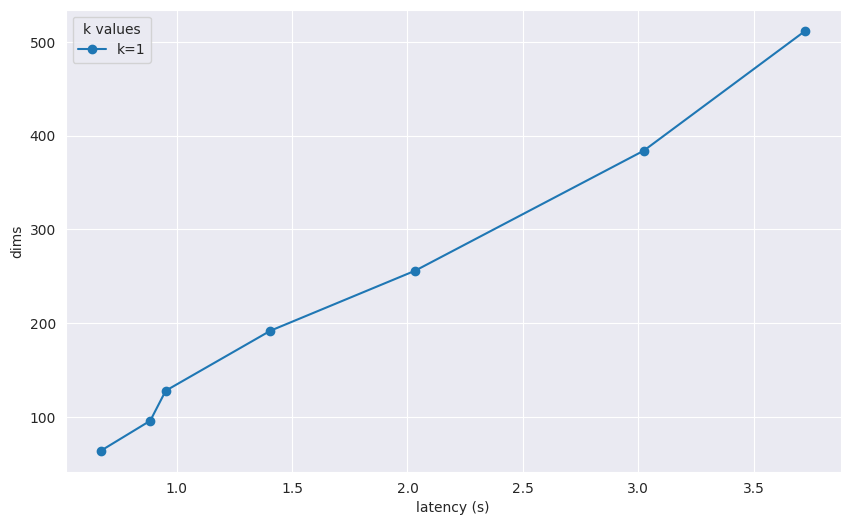

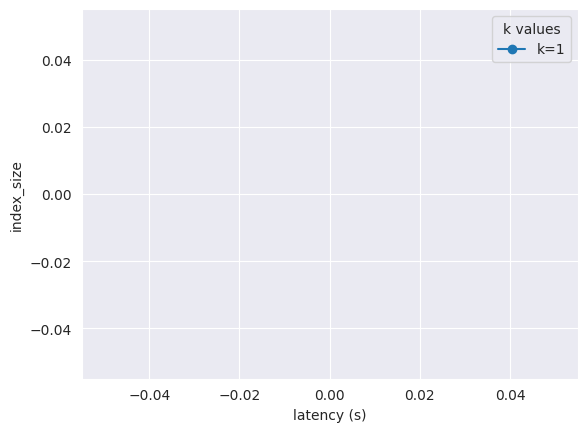

In [119]:
plt.figure(figsize=(10, 6))

k = 1
# for k in df['k'].unique():
spann = df[df['index_type'] == 'spann']
subset = spann[spann['k'] == k]
subset = subset[subset['index_size'] == 100000]
subset = subset[subset['query_size'] == 10000]
plt.plot(subset['latency_(s)'], subset['dims'], marker='o', label=f'k={k}')

plt.xlabel('latency (s)')
plt.ylabel('dims')
# plt.title('SPANN Throughput vs Recall@k')
plt.grid(True)
plt.legend(title='k values')
plt.show()

k = 1
# for k in df['k'].unique():
spann = df[df['index_type'] == 'spann']
subset = spann[spann['k'] == k]
subset = subset[subset['dims'] == 960]
subset = subset[subset['query_size'] == 10000]
plt.plot(subset['latency_(s)'], subset['index_size'], marker='o', label=f'k={k}')

plt.xlabel('latency (s)')
plt.ylabel('index_size')
# plt.title('SPANN Throughput vs Recall@k')
plt.grid(True)
plt.legend(title='k values')
plt.show()

In [120]:
df[df['dims'] == 512]

cpu_architecture  cpu_core_count  \
720             x86_64              12   
724             x86_64              12   
728             x86_64              12   
732             x86_64              12   
736             x86_64              12   
...                ...             ...   
10508           x86_64              12   
10512           x86_64              12   
10516           x86_64              12   
10520           x86_64              12   
10524           x86_64              12   

                                  cpu_model_name  cpu_clock_speed_(MHz)  \
720    Intel(R) Core(TM) i7-10750H CPU @ 2.60GHz               2592.010   
724    Intel(R) Core(TM) i7-10750H CPU @ 2.60GHz               2592.010   
728    Intel(R) Core(TM) i7-10750H CPU @ 2.60GHz               2592.010   
732    Intel(R) Core(TM) i7-10750H CPU @ 2.60GHz               2592.010   
736    Intel(R) Core(TM) i7-10750H CPU @ 2.60GHz               2592.010   
...                                          ...                    ...   
10508  Intel(R) Core(TM) i7-10750H CPU @ 2.60GHz               2591.997   
10512  Intel(R) Core(TM) i7-10750H CPU @ 2.60GHz               2591.997   
10516  Intel(R) Core(TM) i7-10750H CPU @ 2.60GHz               2591.997   
10520  Intel(R) Core(TM) i7-10750H CPU @ 2.60GHz               2591.997   
10524  Intel(R) Core(TM) i7-10750H CPU @ 2.60GHz               2591.997   

       total_DRAM_(GB)  storage_read_count  storage_write_count  \
720          13.653496            14673050                17279   
724          13.653496            14673050                17279   
728          13.653496            14673050                17279   
732          13.653496            14673050                17279   
736          13.653496            14673050                17279   
...                ...                 ...                  ...   
10508        13.653500            14540585                 9319   
10512        13.653500            14553291                 9319   
10516        13.653500            14578695                 9425   
10520        13.653500            14629526                 9427   
10524        13.653500            14731190                 9498   

       storage_read_bytes  storage_write_bytes  \
720          275304896512           9717334016   
724          275304896512           9717334016   
728          275304896512           9717334016   
732          275304896512           9717334016   
736          275304896512           9717334016   
...                   ...                  ...   
10508        438773090304             67842048   
10512        439809996800             67842048   
10516        441949698048             68399104   
10520        446336882688             68452352   
10524        455323805696             68857856   

                                         storage_devices  ... query_size  \
720    [{'Name': 'sda', 'Type': 'disk', 'Size': '388....  ...         10   
724    [{'Name': 'sda', 'Type': 'disk', 'Size': '388....  ...         20   
728    [{'Name': 'sda', 'Type': 'disk', 'Size': '388....  ...         40   
732    [{'Name': 'sda', 'Type': 'disk', 'Size': '388....  ...         80   
736    [{'Name': 'sda', 'Type': 'disk', 'Size': '388....  ...        160   
...                                                  ...  ...        ...   
10508  [{'Name': 'sda', 'Type': 'disk', 'Size': '388....  ...         40   
10512  [{'Name': 'sda', 'Type': 'disk', 'Size': '388....  ...         80   
10516  [{'Name': 'sda', 'Type': 'disk', 'Size': '388....  ...        160   
10520  [{'Name': 'sda', 'Type': 'disk', 'Size': '388....  ...        320   
10524  [{'Name': 'sda', 'Type': 'disk', 'Size': '388....  ...        640   

      peak_dram_(MB) peak_WSS_(MB)                        index index_type  \
720       359.160156    359.160156   gist10K_512D_float32.annoy      annoy   
724       359.164062    359.164062   gist10K_512D_float32.annoy      annoy   
728       359.175781    359.175781   gist10K_51

  cpu_architecture  cpu_core_count                             cpu_model_name  \
0           x86_64              12  Intel(R) Core(TM) i7-10750H CPU @ 2.60GHz   
1           x86_64              12  Intel(R) Core(TM) i7-10750H CPU @ 2.60GHz   
2           x86_64              12  Intel(R) Core(TM) i7-10750H CPU @ 2.60GHz   
3           x86_64              12  Intel(R) Core(TM) i7-10750H CPU @ 2.60GHz   
4           x86_64              12  Intel(R) Core(TM) i7-10750H CPU @ 2.60GHz   

   cpu_clock_speed_(MHz)  total_DRAM_(GB)  storage_read_count  \
0                2592.01        13.653496               55944   
1                2592.01        13.653496               55947   
2                2592.01        13.653496               55947   
3                2592.01        13.653496               55947   
4                2592.01        13.653496               55947   

   storage_write_count  storage_read_bytes  storage_write_bytes  \
0                11623          3015792640           96

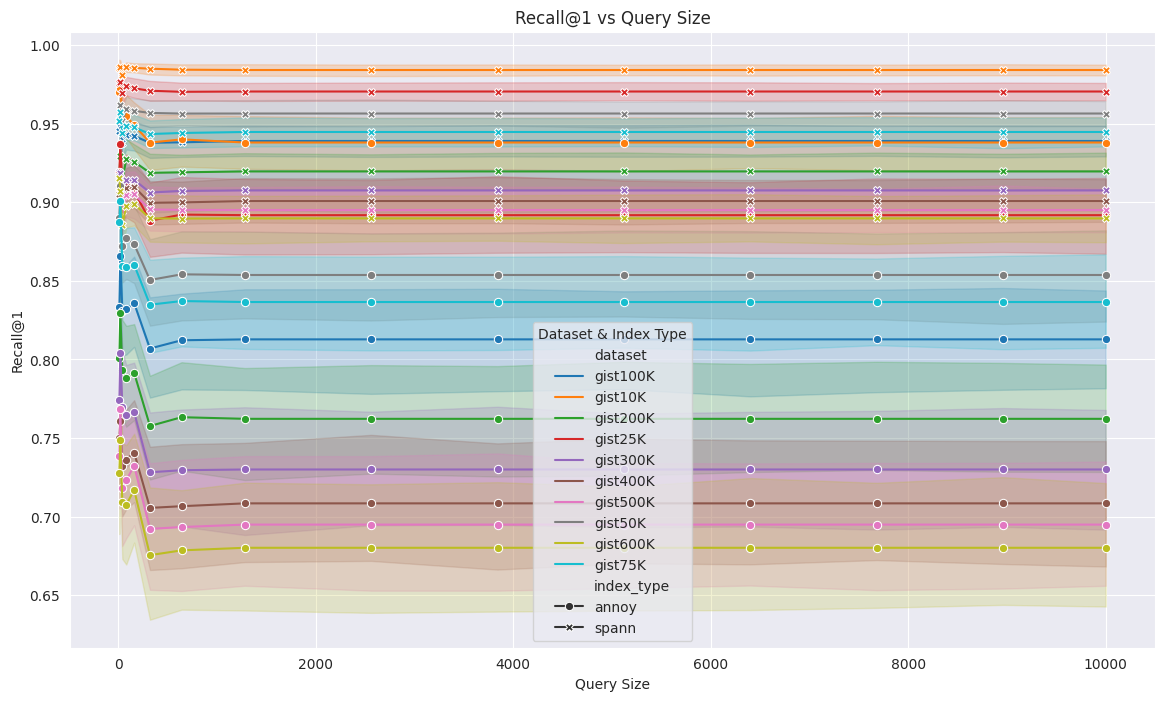

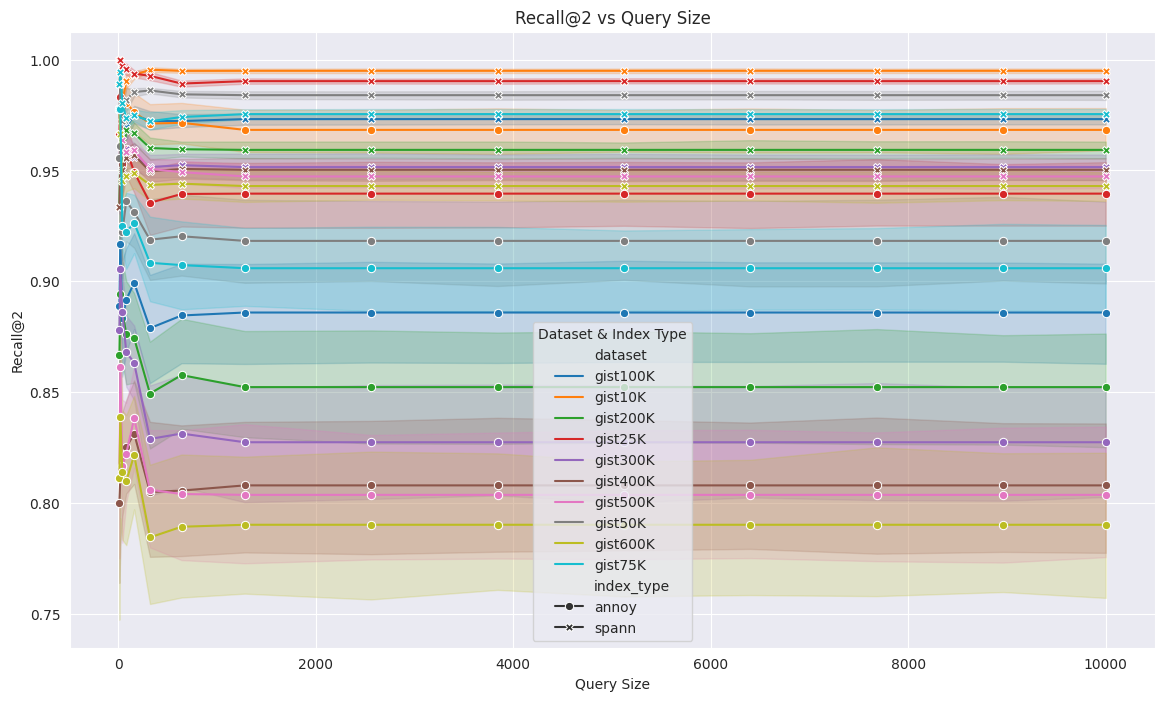

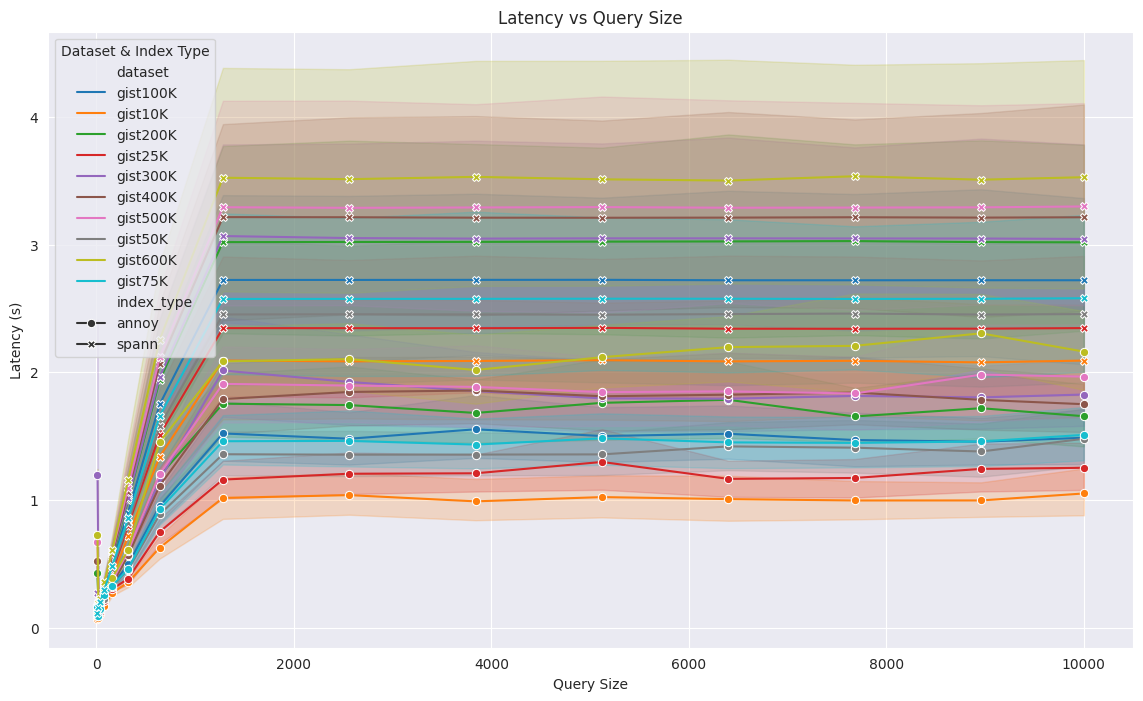

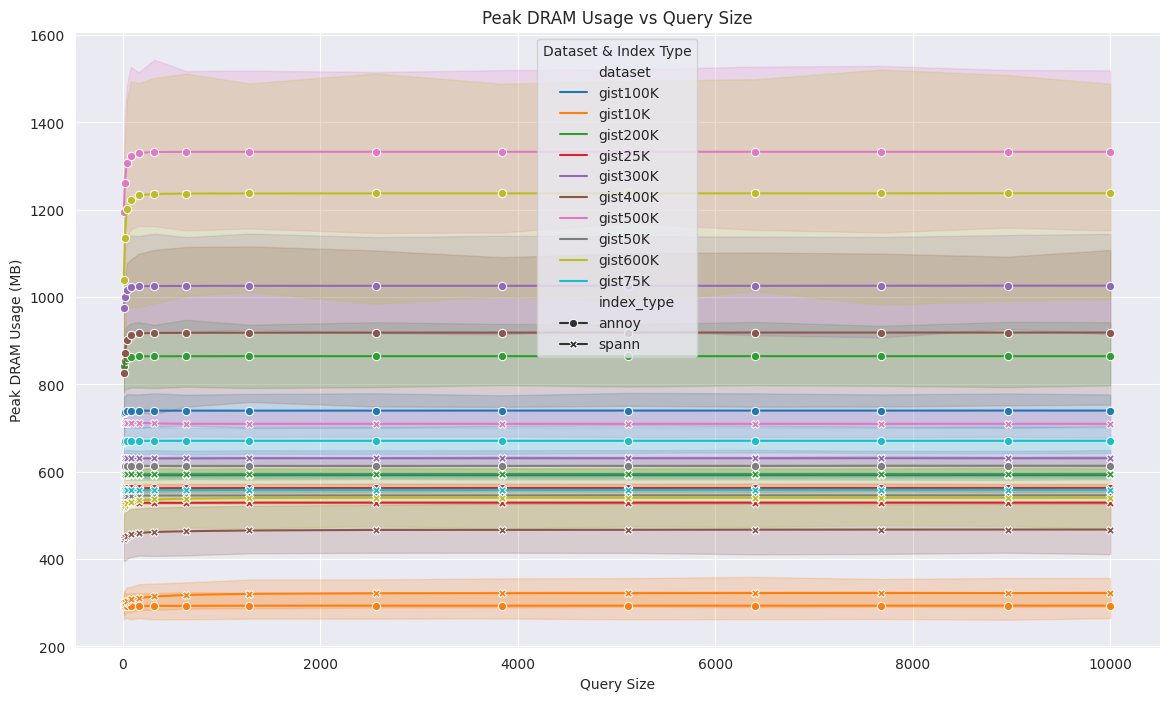

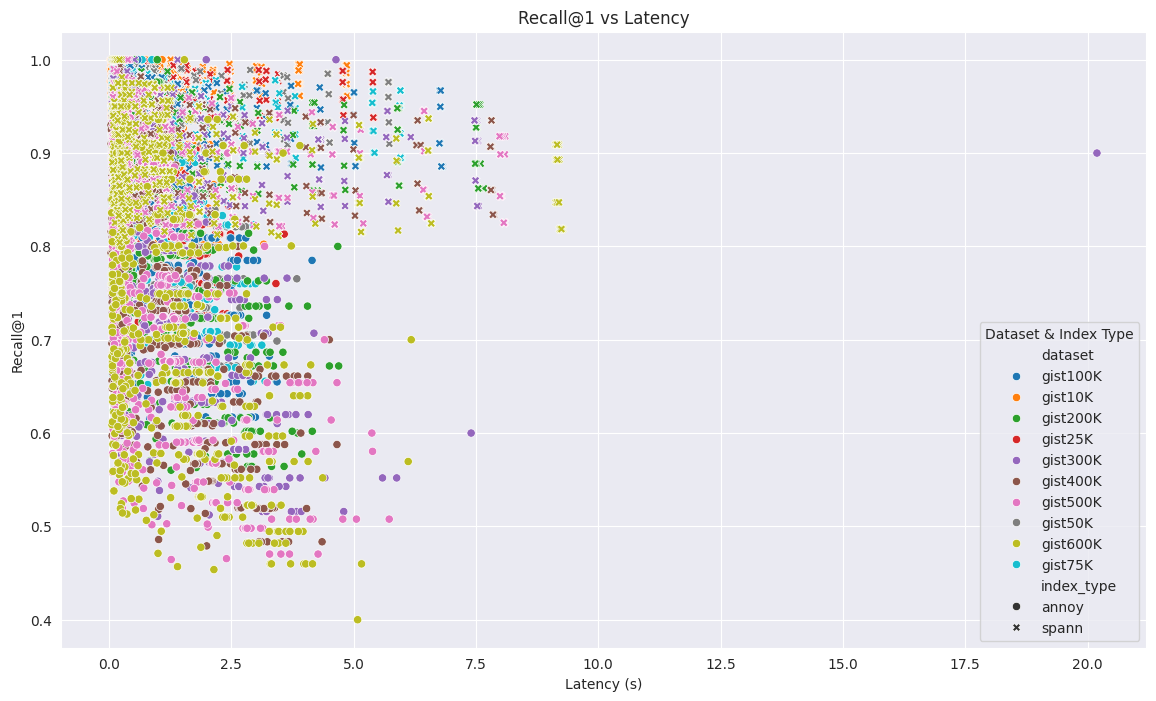

     dataset index_type   recall1   recall2  latency_(s)  peak_dram_(MB)
0   gist100K      annoy  0.821230  0.888689     0.962694      739.572287
1   gist100K      spann  0.940333  0.973505     1.715798      591.980903
2    gist10K      annoy  0.945432  0.973644     0.652668      293.209151
3    gist10K      spann  0.984321  0.992808     1.323035      315.557487
4   gist200K      annoy  0.774777  0.861509     1.123688      862.288932
5   gist200K      spann  0.920483  0.958421     1.904447      594.290842
6    gist25K      annoy  0.899842  0.946872     0.777408      562.731604
7    gist25K      spann  0.971449  0.992761     1.482862      529.264873
8   gist300K      annoy  0.745087  0.845295     1.255756     1019.881199
9   gist300K      spann  0.909288  0.955476     1.933026      630.877033
10  gist400K      annoy  0.720014  0.810486     1.174553      907.770233
11  gist400K      spann  0.902535  0.950279     2.018468      461.924776
12  gist500K      annoy  0.708371  0.812522     1.2

In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the results from CSV
result_file = './results/results.csv'
df = pd.read_csv(result_file)

# Ensure the data is loaded correctly
print(df.head())

# Analysis and Visualization
def visualize_results(df):
    # Convert the 'dataset' and 'index_type' columns to categorical data types for better plotting
    df['dataset'] = df['dataset'].astype('category')
    df['index_type'] = df['index_type'].astype('category')

    # Plotting recall1 vs query_size for each dataset and index_type
    plt.figure(figsize=(14, 8))
    sns.lineplot(data=df, x='query_size', y='recall1', hue='dataset', style='index_type', markers=True, dashes=False)
    plt.title('Recall@1 vs Query Size')
    plt.xlabel('Query Size')
    plt.ylabel('Recall@1')
    plt.legend(title='Dataset & Index Type')
    plt.grid(True)
    plt.show()

    # Plotting recall2 vs query_size for each dataset and index_type
    plt.figure(figsize=(14, 8))
    sns.lineplot(data=df, x='query_size', y='recall2', hue='dataset', style='index_type', markers=True, dashes=False)
    plt.title('Recall@2 vs Query Size')
    plt.xlabel('Query Size')
    plt.ylabel('Recall@2')
    plt.legend(title='Dataset & Index Type')
    plt.grid(True)
    plt.show()

    # Plotting latency vs query_size for each dataset and index_type
    plt.figure(figsize=(14, 8))
    sns.lineplot(data=df, x='query_size', y='latency_(s)', hue='dataset', style='index_type', markers=True, dashes=False)
    plt.title('Latency vs Query Size')
    plt.xlabel('Query Size')
    plt.ylabel('Latency (s)')
    plt.legend(title='Dataset & Index Type')
    plt.grid(True)
    plt.show()

    # Plotting peak_dram vs query_size for each dataset and index_type
    plt.figure(figsize=(14, 8))
    sns.lineplot(data=df, x='query_size', y='peak_dram_(MB)', hue='dataset', style='index_type', markers=True, dashes=False)
    plt.title('Peak DRAM Usage vs Query Size')
    plt.xlabel('Query Size')
    plt.ylabel('Peak DRAM Usage (MB)')
    plt.legend(title='Dataset & Index Type')
    plt.grid(True)
    plt.show()

    # Plotting recall1 vs latency for each dataset and index_type
    plt.figure(figsize=(14, 8))
    sns.scatterplot(data=df, x='latency_(s)', y='recall1', hue='dataset', style='index_type')
    plt.title('Recall@1 vs Latency')
    plt.xlabel('Latency (s)')
    plt.ylabel('Recall@1')
    plt.legend(title='Dataset & Index Type')
    plt.grid(True)
    plt.show()

# Call the visualization function
visualize_results(df)

# Additional Analysis
def additional_analysis(df):
    # Group by dataset and index_type to calculate average recall1 and latency
    grouped = df.groupby(['dataset', 'index_type']).agg({
        'recall1': 'mean',
        'recall2': 'mean',
        'latency_(s)': 'mean',
        'peak_dram_(MB)': 'mean'
    }).reset_index()
    
    # Print out the average metrics
    print(grouped)

# Call the additional analysis function
additional_analysis(df)